In [ ]:
# Import any needed packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests


# Simple model of global δ13C concentration simulations in: Atmosphere, Biosphere, and upper Ocean





#Introduction & Hypothesis
δ13C fluctuates in the Earth system as an indicator of the biosphere’s CO2 photosynthesis and respiration process. Here is a Simple box model for the δ13C concentration change in the Atmosphere, Biosphere, and upper Ocean. The model runs from  the year 1850 till today. The model uses the data from Friedlingstein et al. (2022) for the fluxes and reservoir estimation. The measurements from Scrippsco2 project & the Law Dome Ice Core are used as Ground truth to correct and calibrate the model.  
As a beginning, here is a back-of-envelope modeling of the system with annual resolution. The next step will be to increase the temporal resolution.
I hypothesize that the model will follow previous study conclusions of:   

General expected trend is to lower the atmospheric value of δ13C.   
The same CO2 El Niño pattern expected in the δ13C fluctuation.  
A repeat of the annual and interannual cycles.

The significance of the model is to improve the quantification of the carbon cycle especially the carbon sink in vegetations


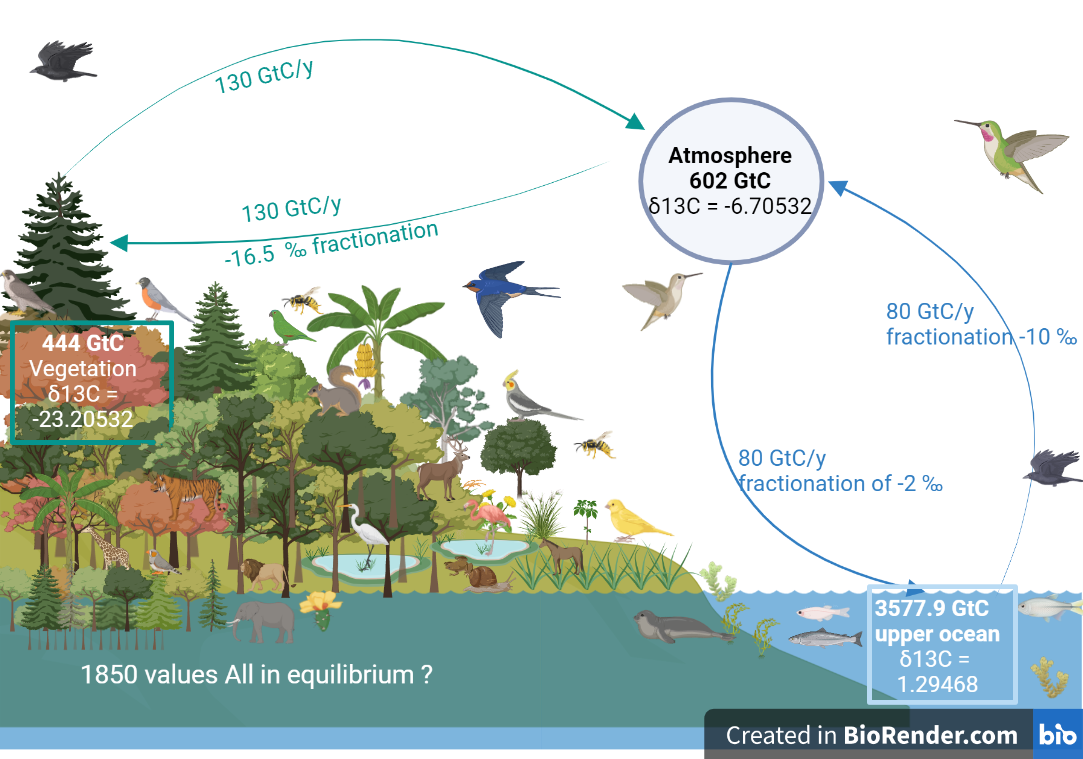

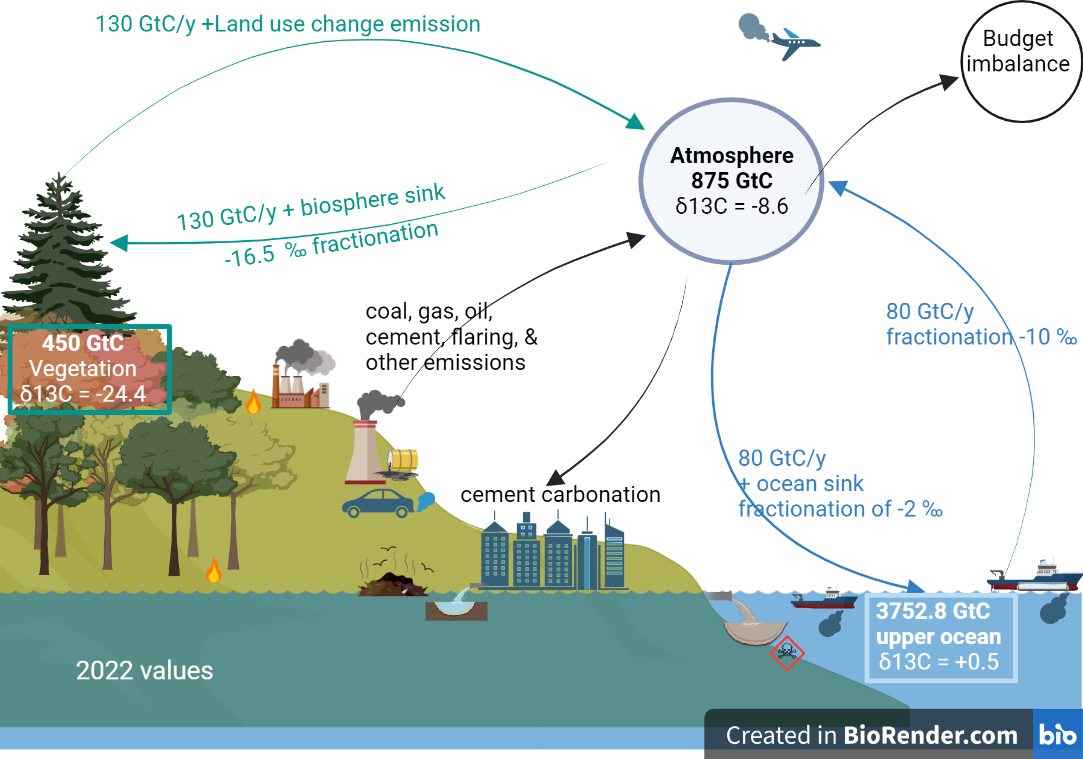

The two sketches above are for the beginning (1850) and the model's final environment (2021). The vegetation shift, the enormous biodiversity decline, and pollution are schematically illustrated in both sketches. Both sketches are a simplification for a box model rather than on the scale. The values of fluxes are from Friedlingstein et al. (2022). The latter is used to determine today's reservoir size and calculate the 1850 reservoir size. Today's δ13C atmospheric value was obtained from the Scrippsco2 project. Whereas the 1850 value of the atmospheric δ13C obtained from the Law Dome Ice Core (Rubino et al., 2019). The `parameters` paragraphs will discuss further the other δ13C values and the fractionation factors from additional literature or with model calibration.

# Importing data

## 1- Importing carbon budget2022 data
The data from Friedlingstein et al. (2022)

In [ ]:

url = "https://data.icos-cp.eu/licence_accept?ids=%5B%221umMtgeUlhS2Y1YW_Qp94bu3%22%5D"  
filename = "Globalcarbon.xlsx"  

response = requests.get(url)

if response.status_code == 200:
    with open(filename, "wb") as f:
        f.write(response.content)
    excel_file = pd.ExcelFile(filename)
    sheet_name = "Global Carbon Budget"

    df1 = pd.read_excel(filename, sheet_name='Historical Budget', 
                       index_col=0, skiprows=range(15),usecols='A,C:H')
    df1 = df1.iloc[-172:]
    df1.columns = ['land_use_change_emission', 'atmospheric_growth',
       'ocean_sink', 'land_sink', 'cement_carbonation_sink',
       'budget_imbalance']
    df1.fillna(value=0, inplace=True)
    # Check point to nullify the fluxes in df1 only
    #df1 = df1*0  


    df2 = pd.read_excel(filename, sheet_name='Fossil Emissions by Category', 
                       index_col=0, skiprows=range(8),usecols='A,C:H')
    df2.columns = ['coal_emission',
       'oil_emission', 'gas_emission', 'cement_emission', 'flaring_emission',
       'other_emission']
    df2.fillna(value=0, inplace=True)
    df2 = df2 /1000  # convert from MtC to GtC

    # Check point to nullify the fossil fuel only
    #df2 = df2*0  

    #print(df1.head(),df2.head(5)) 
else:
    print("Failed to download", url)

df = pd.concat([df1,df2], axis=1)
time= df.index

# Check point to nullify BOTH : the fossil fuels emission & fluxes
# This checks if the model will reach the equilibrium and when 
# This check could be used to improve begin value if we assume that with 0 fluxes the system must stay in equilibrium
#df = df*0 

#len(df)
#df.plot();plt.show()

In [ ]:
(df2['coal_emission'][1996])+ (df2['gas_emission'][1996])+ (df2['oil_emission'][1996])

6.292301885991851

### Emissions uncertainties of Friedlingstein et al. (2022)  
Emissions from **fossil fuel** combustion and industrial processes (uncertainty of **±5%** for a ± 1 sigma confidence level)  

Emissions from **land-use change** (uncertainty of **±0.7 GtC/yr**). Average of three bookkeeping models: H&N (Houghton &Nassikas, 2017), BLUE (Hansis, et al., 2015) and OSCAR (Gasser et al., 2020).  
The **land sink** (uncertainty of **±0.5 GtC/yr** on average) was estimated from the average of 16 dynamic global vegetation models.  

The **ocean sink** (uncertainty of **±0.4 GtC/yr** on average) is estimated from the average of 10 global ocean biogeochemistry models and the average of 7 ocean fCO2 data products.  
The budget imbalance is the sum of emissions (fossil fuel and industry + land-use change) minus (atmospheric growth + ocean sink + land sink + cement carbonation sink); it is a measure of our imperfect data and understanding of the contemporary carbon cycle.  

###plot data

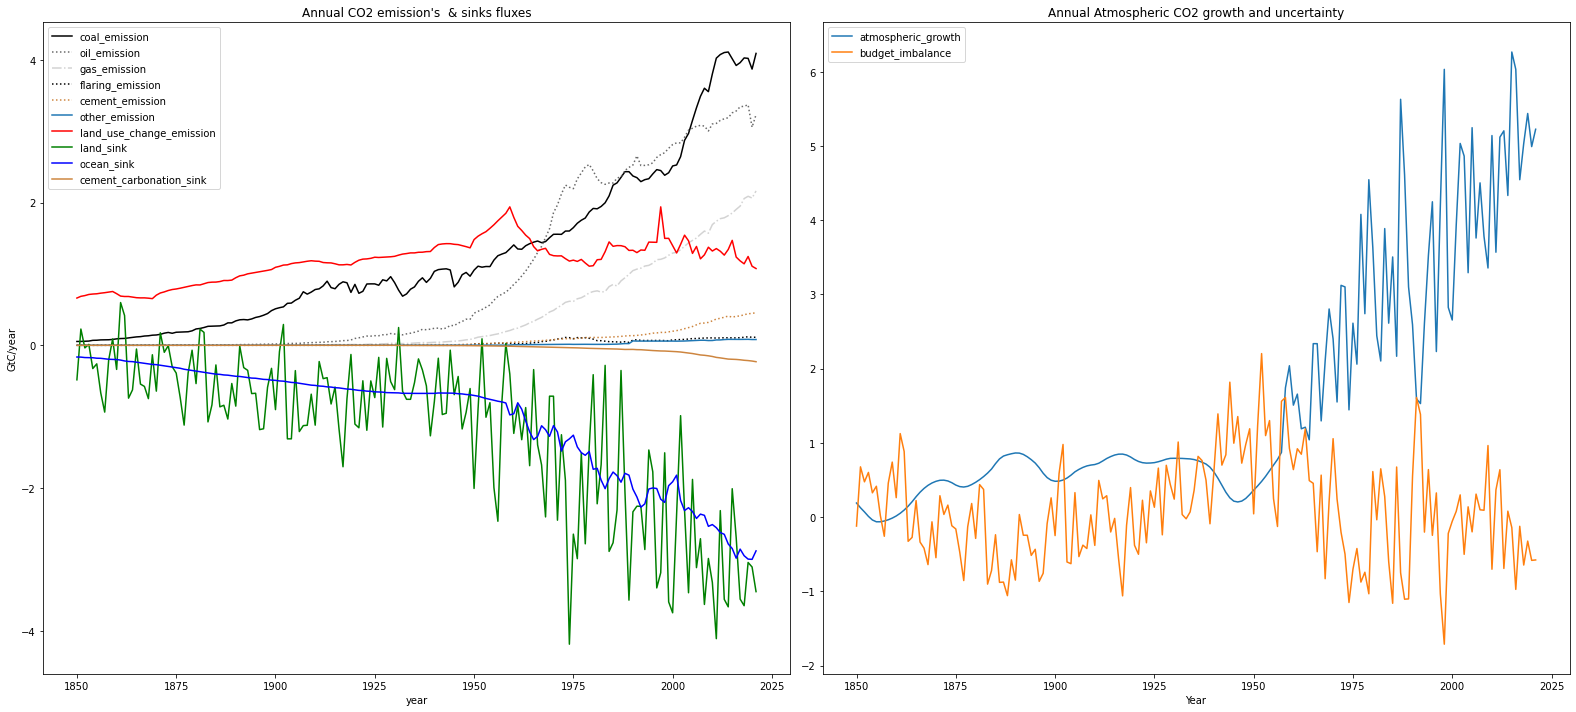

In [ ]:
# check what we have imported
# --------------Visual inspection--------------# 
fig, (ax1, ax2) = plt.subplots(1, 2)

#plotting the CO2 emission's  & sinks fluxes
# emissions
plt.subplot(1,2,1)
df.coal_emission.plot(figsize=(22, 10),color='black',linestyle='-')
df.oil_emission.plot(color='dimgrey',linestyle=':')
df.gas_emission.plot(color='lightgrey',linestyle='-.')
df.flaring_emission.plot(color='black',linestyle=':')
df.cement_emission.plot(color='peru', linestyle=':')
df.other_emission.plot()
df.land_use_change_emission.plot( color='r')
# sinks
(df.land_sink*-1).plot(color='g')
(df.ocean_sink*-1).plot(color='b')
(df.cement_carbonation_sink*-1).plot(color='peru')

plt.legend()
plt.xlabel("year")
plt.ylabel("GtC/year")
plt.title("Annual CO2 emission's  & sinks fluxes")

#plotting the atmospheric growth and uncertainty
df.atmospheric_growth.plot(figsize=(22, 10),ax=ax2)
df.budget_imbalance.plot(ax=ax2)
plt.legend()
ax2.set_title("Annual Atmospheric CO2 growth and uncertainty")
ax2.legend()
fig.tight_layout()
plt.show()

### BoxPlot

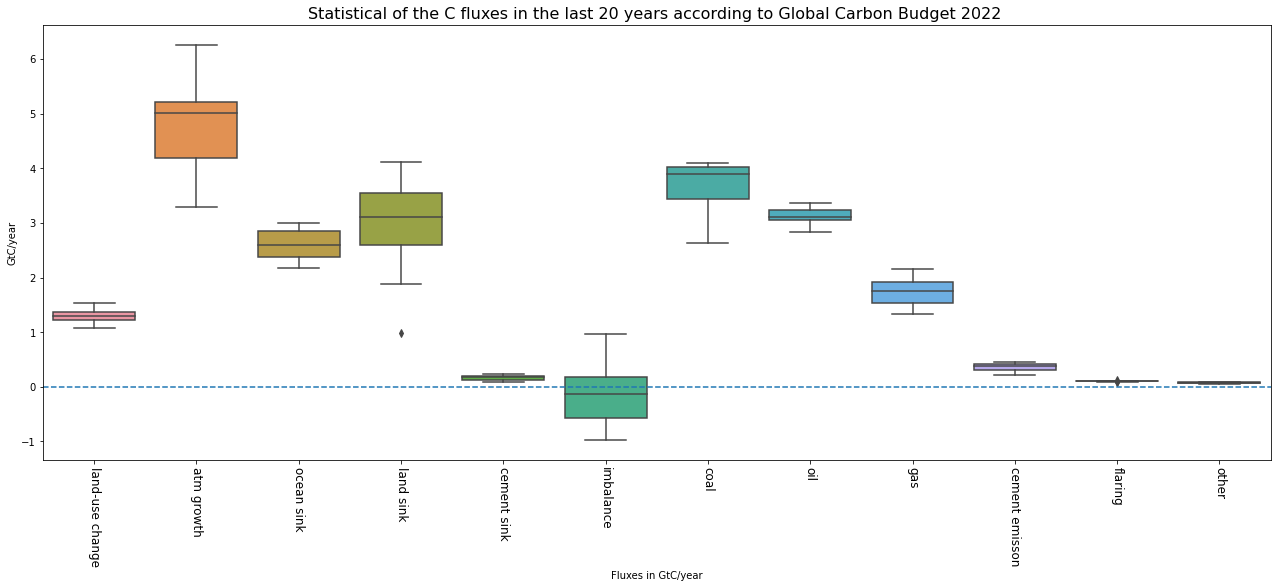

In [ ]:
# --------------Statistical inspection--------------# 
#df.describe()
plt.figure(figsize=(22,8))
boxplot3= sns.boxplot(data=df.iloc[152:,:])
boxplot3.set(xlabel='Fluxes in GtC/year',ylabel='GtC/year')
boxplot3.axes.set_title("Statistical of the C fluxes in the last 20 years according to Global Carbon Budget 2022 ", fontsize=16)
boxplot3.tick_params(axis='x', labelrotation=270)
boxplot3.set_xticklabels(['land-use change','atm growth','ocean sink','land sink','cement sink','imbalance','coal','oil','gas','cement emisson','flaring','other'], fontsize=12)
boxplot3.axhline(0, linestyle="dashed")
plt.show()

### Visualize the statistical data of the Carbon budget

Here : https://youtu.be/RHU5A3IfDT4  

The plot begins with the whole data set from 1850 till 2021; then, it iterates to reproduce a boxplot for a shorter period. It ends with the fluxes in the last 21 years. The high variability in land Carbon sinks is apparent. The land sink grows faster than the ocean sink, and land-use changes emissions. In the next code line is the recipe for that visualization on YouTube.

In [ ]:
# visualization recipe
import imageio.v2 as imageio
images = []

for i in range(2):  # this number must be 150 for visualization of 150 year
  plt.figure(figsize=(22,13))
  boxplot= sns.boxplot(data=df.iloc[i:,:])
  boxplot.set(xlabel='Fluxes in GtC/year',ylabel='GtC/year')
  boxplot.axes.set_title(f"Statistical of Carbon fluxes in the last {172-i} years according to Global Carbon Budget 2022 ", fontsize=16)
  boxplot.tick_params(axis='x', labelrotation=270)
  boxplot.set_xticklabels(['land-use change','atm growth','ocean sink','land sink','cement sink','imbalance','coal','oil','gas','cement emisson','flaring','other'], fontsize=15)
  boxplot.axhline(0, linestyle="dashed")
  fig = boxplot.get_figure()  # get the figure from the sns object
  fig.savefig('saved.png')  # save it to the images list
  images.append(imageio.imread('saved.png'));
  plt.close() # don not draw the image
imageio.mimsave('movie.gif', images)

### convert the imported Crabon Budget DataFrame to numpy array

In [ ]:
# --------------The fluxes--------------#
# Fluxes data are from Friedlingstein et al. (2022)
# Biosphere fluxes
from_biosphere_to_Atmosphere = np.array(130 + df.land_use_change_emission)
from_Atmosphere_to_biosphere = np.array(130 + df.land_sink)
# Ocean fluxes
from_ocean_to_Atmosphere = np.repeat(80, 172)   # we repeat the same flux in all the loop of 172 year
from_Atmosphere_to_ocean = np.array(80 + df.ocean_sink )  

# fossil fuel fluxes
# Make numpy array from the columns to to facilitate the loop
# for emissions
coal_emission	= np.array(df.coal_emission)
gas_emission	= np.array(df.gas_emission)
oil_emission	= np.array(df.oil_emission)
cement_emission	= np.array(df.cement_emission)
flaring_emission	= np.array(df.flaring_emission)
other_emission	= np.array(df.other_emission)
# and for the carbonation_sink &  budget_imbalance
cement_carbonation_sink = np.array(df.cement_carbonation_sink)
budget_imbalance =    np.array(df.budget_imbalance)

### Petrochemical 
Not all the reported fossil fuel is burned into the atmosphere. Many products are made from fossil fuel but end up not-burned in other places.  Take for example the leakages during transfer and usage of a car diesel leak or ship tanker washing. Most importants are the Petrochemical Feedstocks. Fossil fuels are incorporated **in** many Petrochemical Feedstocks like fertilizer, rubber, clothes, fabrics, asphalt, and various plastics. Most petrochemicals like plastics or asphalt remain in the environment and are not burnt. IEA (2018) estimates that **14% of oil** and **8% of gas** used in Petrochemical Feedstocks  
In the following code line, I will subtract IEA estimation of Petrochemical usage of oil and gas

In [ ]:
# 14% of the oil not burned
# The burned is 100-14=86%
# multiply the flux by 0.86
oil_emission *=  0.86
gas_emission *=  0.92

## 2- Importing Scrippsco2 data

In [ ]:
# importing Scrippsco2 atmosphere data
# I will compare the atmosphere model with these measurements

# importing the d13C south pole measurments from Scrippsco2 project
url_south_pole_13C= 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/flask_isotopic/monthly/monthly_flask_c13_spo.csv'
south_pole_13C = pd.read_csv(url_south_pole_13C, skiprows=60, usecols=[3,4], index_col = [0])
south_pole_13C= south_pole_13C.astype(float)
south_pole_13C.dropna(inplace = True)
spo_time = south_pole_13C.index

# importing the CO2 south pole measurments from Scrippsco2 project
url_south_pole_CO2= 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/merged_in_situ_and_flask/monthly/monthly_merge_co2_spo.csv'
south_pole_CO2 = pd.read_csv(url_south_pole_CO2, skiprows=58, usecols=[3,4], index_col = [0])
south_pole_CO2= south_pole_CO2.astype(float)
south_pole_CO2.dropna(inplace = True)

# Constructing the atmosphere Crabon pool size using the CO2 measurements of Scrippsco2
# I will use    GtC = 2.13 X ppm 
atmosphere_C_scrippsco2= 2.13 * south_pole_CO2
atmosphere_C_scrippsco2.columns =['Atmospheric_C_pool_scrippsco2_GtC']

# importing the Barrow_Alaska measurments from Scrippsco2 project
url_ptb_13C= 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/flask_isotopic/monthly/monthly_flask_c13_ptb.csv'
ptb_13C = pd.read_csv(url_ptb_13C, skiprows=60, usecols=[3,4], index_col = [0])
ptb_13C = ptb_13C.astype(float)
ptb_13C.dropna(inplace = True)
ptb_time = ptb_13C.index

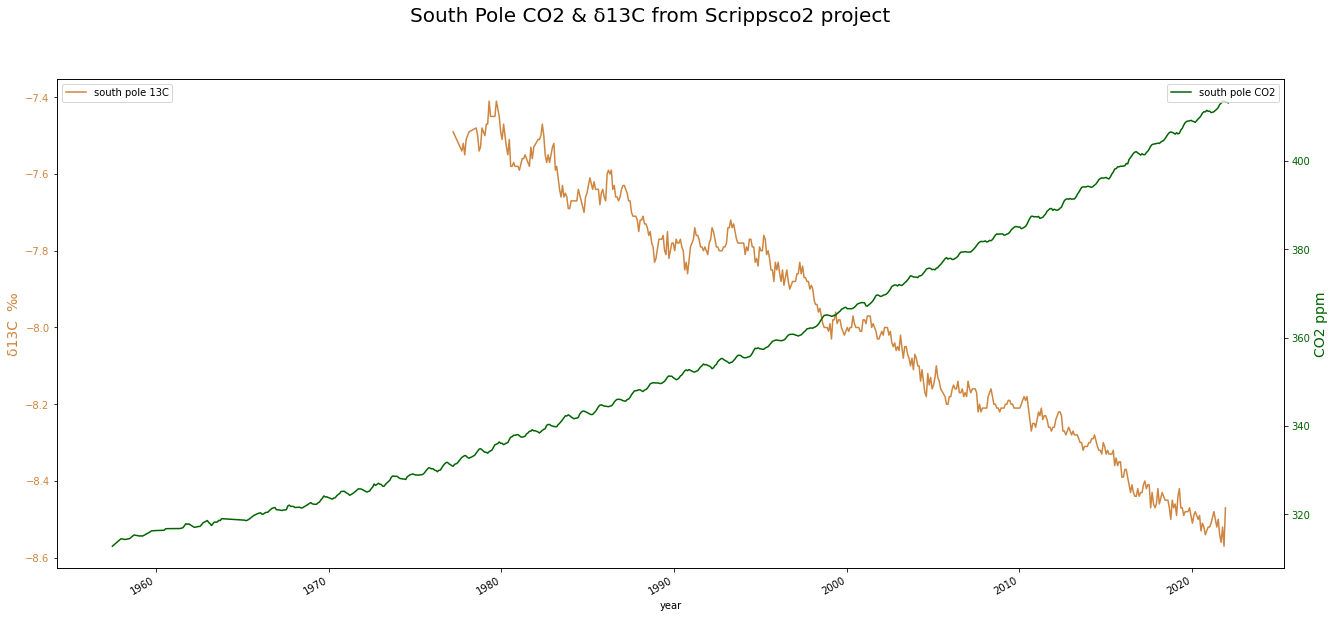

In [ ]:
# visualize d13C and CO2 imported data in ONE plots
fig, ax1 = plt.subplots(figsize=(22, 10))
ax2 = ax1.twinx()

ax1.plot(south_pole_13C.index, south_pole_13C, label='south pole 13C', color='peru')
ax2.plot(south_pole_CO2.index, south_pole_CO2, label='south pole CO2', color='darkgreen')
ax1.legend(loc=("upper left"))
ax2.legend(loc="upper right")

ax1.set_xlabel("year")
ax1.set_ylabel("δ13C  ‰", color='peru', fontsize=14)
ax1.tick_params(axis="y", labelcolor='peru')

ax2.set_ylabel("CO2 ppm", color='darkgreen', fontsize=14)
ax2.tick_params(axis="y", labelcolor='darkgreen')

fig.suptitle("South Pole CO2 & δ13C from Scrippsco2 project", fontsize=20)
fig.autofmt_xdate()

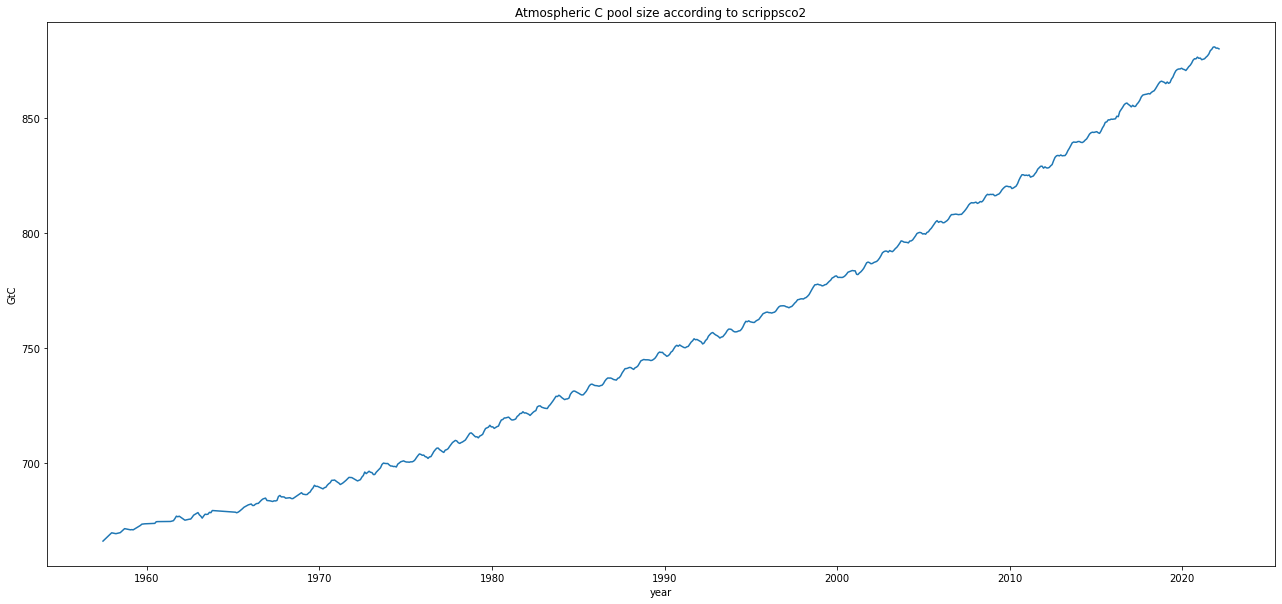

In [ ]:
# visualize the Atmospheric C pool size according to scrippsco2
plt.figure(figsize=(22, 10))
plt.plot(atmosphere_C_scrippsco2)
plt.xlabel("year")
plt.ylabel("GtC")
plt.title("Atmospheric C pool size according to scrippsco2")
#plt.legend()
plt.show()

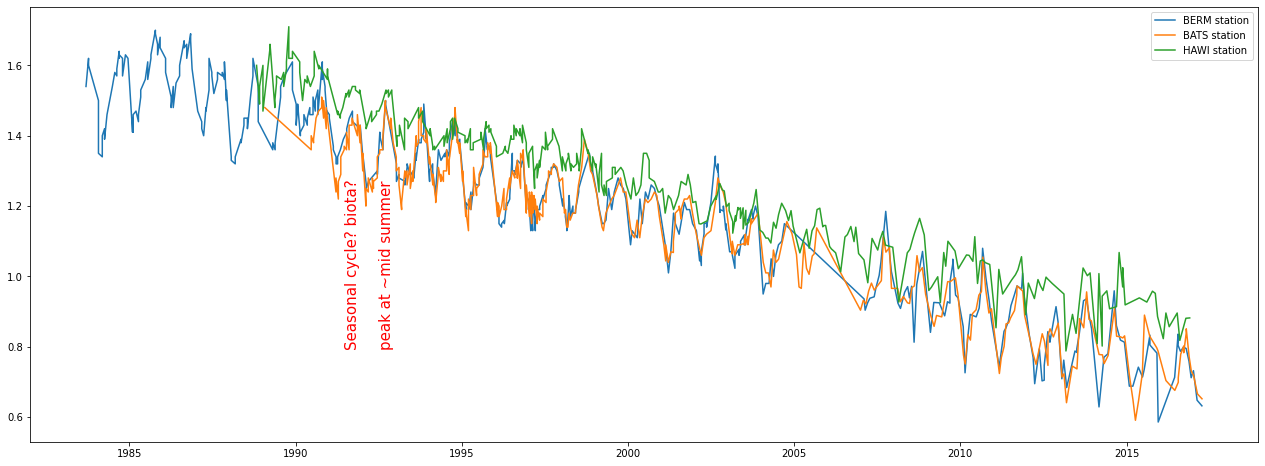

In [ ]:
# importing Scrippsco2 ocean data
# https://scrippsco2.ucsd.edu/data/seawater_carbon/ocean_time_series.html
# I will compare the ocean model with these measurements

# importing the  Hydrostation S (BERM)   measurments from Scrippsco2 project
# Hydrostation 'S' is located ~26 km southeast of the island of Bermuda (32°10'N, 64°30'W)
url_berm_13C= 'https://scrippsco2.ucsd.edu/assets/data/seawater/BERM.csv'
berm_13C = pd.read_csv(url_berm_13C, skiprows=35, usecols=[3,7], index_col = [0])
berm_13C = berm_13C.astype(float)
berm_13C.dropna(inplace = True)
berm_time = berm_13C.index

# importing the  Bermuda Atlantic Time-series Study (BATS) measurments from Scrippsco2 project
# BATS is located ~80 km southeast of Bermuda (31°50’N, 64°10’W)
url_bats_13C= 'https://scrippsco2.ucsd.edu/assets/data/seawater/BATS.csv'
bats_13C = pd.read_csv(url_bats_13C, skiprows=35, usecols=[3,7], index_col = [0])
bats_13C = bats_13C.astype(float)
bats_13C.dropna(inplace = True)
bats_time = bats_13C.index

# importing the  Hawaii Ocean Time-series Station ALOHA (HAWI)  measurments from Scrippsco2 project
# HOT station ALOHA is located in the North Pacific subtropical gyre ~100 km north of the island of ‘Oahu, Hawaii (22°45’N, 158°00’W).
url_hawi_13C= 'https://scrippsco2.ucsd.edu/assets/data/seawater/HAWI.csv'
hawi_13C = pd.read_csv(url_hawi_13C, skiprows=35, usecols=[3,7], index_col = [0])
hawi_13C = hawi_13C.astype(float)
hawi_13C.dropna(inplace = True)
hawi_time = hawi_13C.index

plt.figure(figsize=(22, 8))
plt.plot(berm_13C, label='BERM station')
plt.plot(bats_13C, label='BATS station')
plt.plot(hawi_13C, label='HAWI station')
plt.legend()
plt.text(1991.5, 0.8, "Seasonal cycle? biota?", color='r',rotation = 90, fontsize=15)
plt.text(1992.5, 0.8, "peak at ~mid summer", color='r',rotation = 90, fontsize=15)
plt.show()

## 3- Import Law Dome Ice Core data
This data is from  (Rubino et al., 2019)

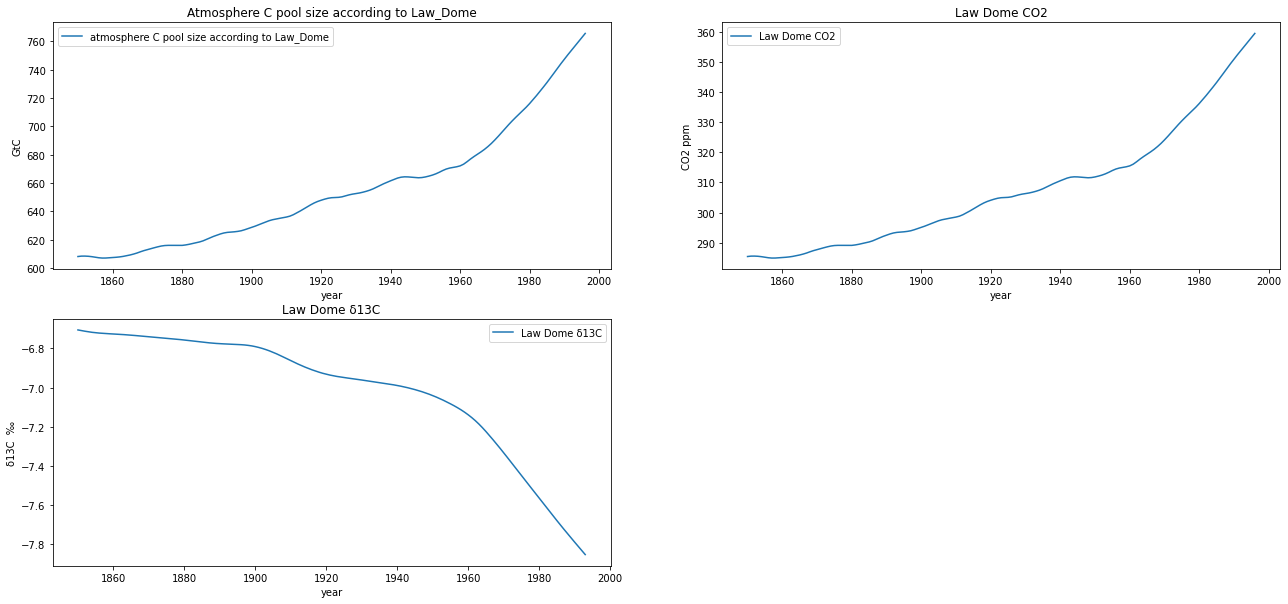

In [ ]:
Law_Dome_Ice_core_url = 'https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/law/law2018splines.txt'

# Import the d13 data
Law_Dome_d13C = np.loadtxt(Law_Dome_Ice_core_url, delimiter='	', skiprows=948, usecols = (9,10), max_rows=144)

# Import the CO2 data
Law_Dome_CO2 = np.loadtxt(Law_Dome_Ice_core_url, delimiter='	', skiprows=1814, usecols = (0,1))

# Constructing the atmosphere Crabon pool size using the CO2 measurements of Law Dome
# I will use    GtC = 2.13 X ppm 
atmosphere_C_Law_Dome= 2.13 * Law_Dome_CO2[:,1]

# visualize imported data in separate plots
fig, axs = plt.subplots(2, 2,figsize=(22, 10))

axs[0, 0].plot(Law_Dome_CO2[:,0], atmosphere_C_Law_Dome, label='atmosphere C pool size according to Law_Dome')
axs[0, 0].set(xlabel= "year", ylabel= "GtC")
axs[0, 0].set_title("Atmosphere C pool size according to Law_Dome")
axs[0, 0].legend()

axs[0, 1].plot(Law_Dome_CO2[:,0], Law_Dome_CO2[:,1], label='Law Dome CO2')
axs[0, 1].set(xlabel= "year", ylabel= "CO2 ppm")
axs[0, 1].set_title("Law Dome CO2")
axs[0, 1].legend()

axs[1, 0].plot(Law_Dome_d13C[:,0], Law_Dome_d13C[:,1], label='Law Dome δ13C')
axs[1, 0].set(xlabel= "year", ylabel= "δ13C  ‰")
axs[1, 0].set_title("Law Dome δ13C")
axs[1, 0].legend()

axs[1, 1].remove()
plt.show()

In [ ]:
# We will use the Law dome d13 value in the model as begin value
Law_dome_d13C_value_in_1850= Law_Dome_d13C[0][1]
Law_dome_d13C_value_in_1850

-6.7053

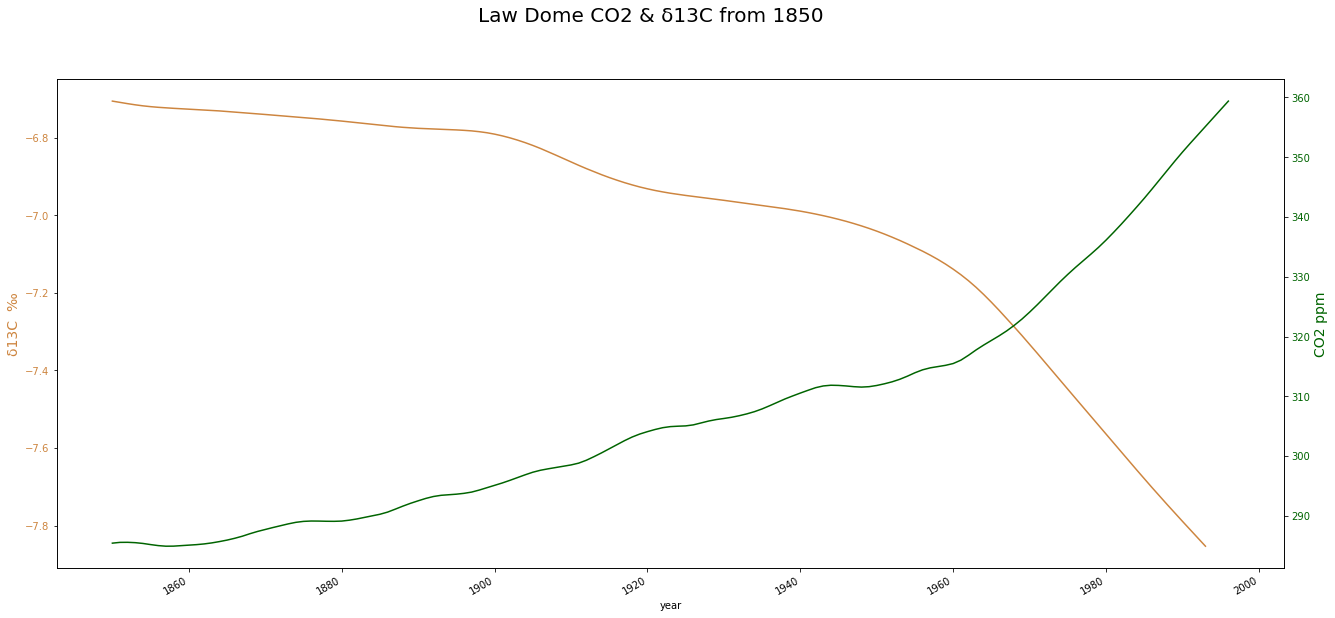

In [ ]:
# visualize d13C and CO2 data in ONE plots
fig, ax1 = plt.subplots(figsize=(22, 10))
ax2 = ax1.twinx()

ax1.plot(Law_Dome_d13C[:,0], Law_Dome_d13C[:,1], label='Law Dome δ13C', color='peru')
ax2.plot(Law_Dome_CO2[:,0], Law_Dome_CO2[:,1], label='Law_Dome_CO2', color='darkgreen')

ax1.set_xlabel("year")
ax1.set_ylabel("δ13C  ‰", color='peru', fontsize=14)
ax1.tick_params(axis="y", labelcolor='peru')

ax2.set_ylabel("CO2 ppm", color='darkgreen', fontsize=14)
ax2.tick_params(axis="y", labelcolor='darkgreen')

fig.suptitle("Law Dome CO2 & δ13C from 1850", fontsize=20)
fig.autofmt_xdate()

## Plot both Law Dome AND Scrippsco2 data

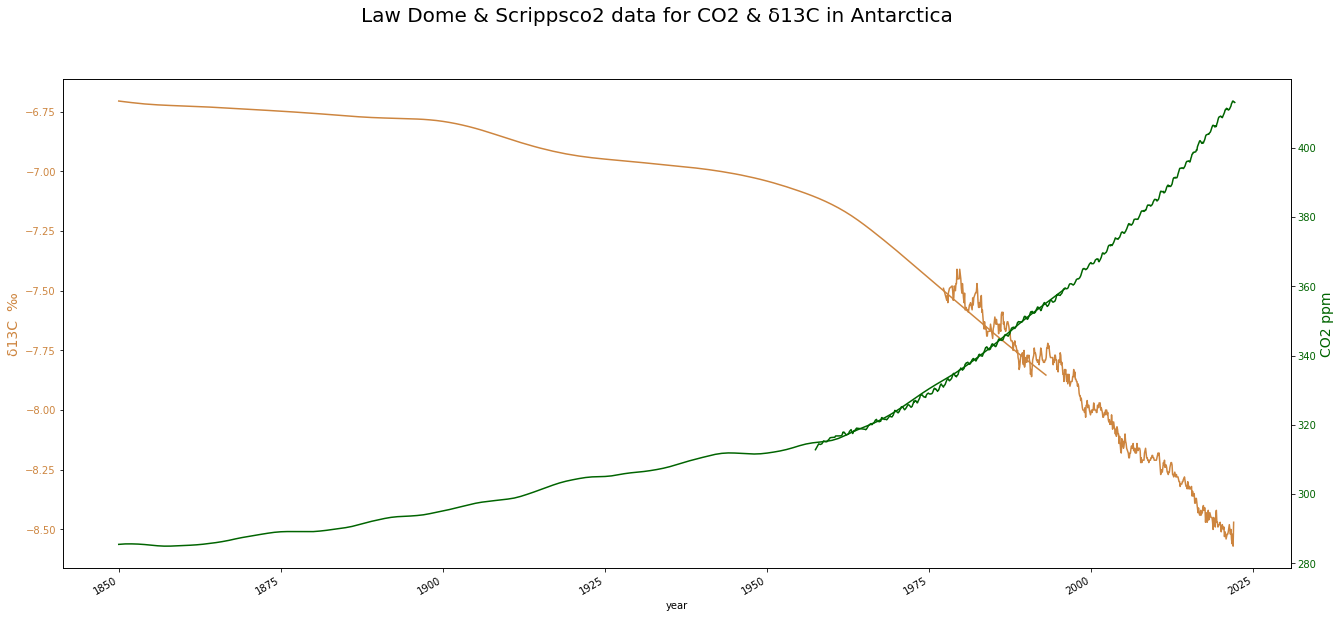

In [ ]:
# plot Law Dome AND Scrippsco2 data all in one plot
fig, ax1 = plt.subplots(figsize=(22, 10))
ax2 = ax1.twinx()

ax1.plot(Law_Dome_d13C[:,0], Law_Dome_d13C[:,1], label='Law Dome δ13C', color='peru')
ax1.plot(south_pole_13C.index, south_pole_13C, label='south pole 13C', color='peru')
ax2.plot(Law_Dome_CO2[:,0], Law_Dome_CO2[:,1], label='Law_Dome_CO2', color='darkgreen')
ax2.plot(south_pole_CO2.index, south_pole_CO2, label='south pole CO2', color='darkgreen')

ax1.set_xlabel("year")
ax1.set_ylabel("δ13C  ‰", color='peru', fontsize=14)
ax1.tick_params(axis="y", labelcolor='peru')

ax2.set_ylabel("CO2 ppm", color='darkgreen', fontsize=14)
ax2.tick_params(axis="y", labelcolor='darkgreen')

fig.suptitle("Law Dome & Scrippsco2 data for CO2 & δ13C in Antarctica", fontsize=20)
fig.autofmt_xdate()

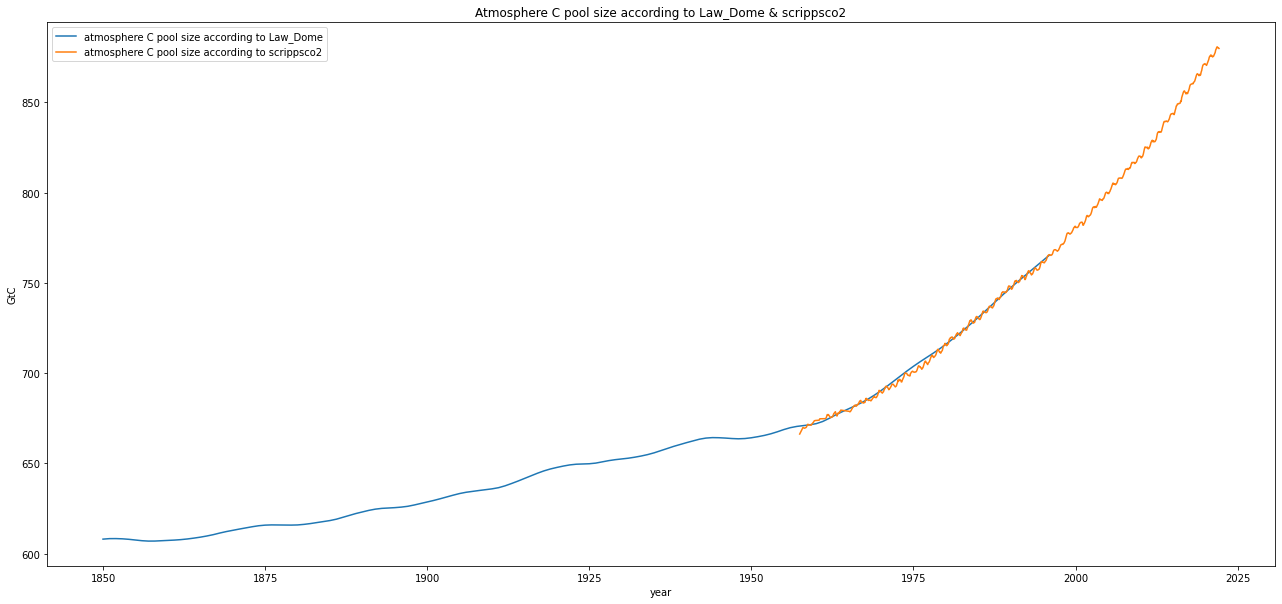

The resvoir begin value is 608.01 GtC in the year 1850 
 And the final value 879.903 GtC in the year 2022


In [ ]:
#Plot both Law Dome AND Scrippsco2 data Atmospheric C pool size 
plt.figure(figsize=(22, 10))
plt.plot(Law_Dome_CO2[:,0], atmosphere_C_Law_Dome, label='atmosphere C pool size according to Law_Dome')
plt.plot(atmosphere_C_scrippsco2, label='atmosphere C pool size according to scrippsco2')
plt.xlabel("year")
plt.ylabel("GtC")
plt.title("Atmosphere C pool size according to Law_Dome & scrippsco2")
plt.legend()
plt.show()

print(f"The resvoir begin value is", round(atmosphere_C_Law_Dome[0],2),"GtC in the year",round(Law_Dome_CO2[0,0]),'\n', 
      "And the final value", atmosphere_C_scrippsco2.iloc[-1][0], "GtC in the year", round(atmosphere_C_scrippsco2.iloc[-1].name))

# parameters

## Fractionations

In general,the fluxes have the d13C signature of its origin reservoir. Except three fluxes:

1- The flux from atmosphere to the biosphere because of the photosynthetic CO2 fixation **fractionation**. photosynthetis favor the lighter carbon isotope 12C which make the biosphere depleted in d13C (Brugnoli & Farquhar, 2000). The fractionation yields lower value in C3 vegetations like trees ~d13C=-25, than the fractionation in C4 vegetation like grasses and some crops ~ d13C=-13 (Ruddiman, W. F. ,2001). According to Battle et al (2000), the fractionation value is (-18 ‰) for all in general. 

In this model I will use the value of =(atmospherics value-**weighted_terrestrial_fractionation (-16.5 ‰)**) as a value of the flux from atmosphere to biosphereas. The value of (-16.5 ‰) reported by Still et al. (2003) after considering **assimilation-weighted** terrestrial discrimination against 13CO2 for both C3 and C4 photosynthesis paths.  
The fractionations value in the model is a rough estimation, not only because of the difference in C3, C4, and CAM photosynthesis but also because photosynthesis fractionations are also affected by tree height, canopy position, and light exposure (Vadeboncoeur et al., 2020)

2- The flux from air to the ocean. Battle et al.(2000) calculated the ocean kinetic fractionation as (-2.0 ± 1.0‰). I will use this value of (-2) in the model as a  parameter **fractionation_from_atmosphere_to_ocean**. Battle et al.(2000) took this estimation originally from both both (Siegenthaler & Münnich,1981; Rik Wanninkhof,1985). Rik Wanninkhof (1985) wrote: "*The experimental results give a fractionation of-2.4 ± 2.0‰ while the calculated value for invasion is-2.1 ± 0.3‰ (i.e. 13CO2 invading slower), The results show that the fractionation of CO2 during invasion into a hydroxide solution (-14‰) is clearly too high as a value for invasion into seawater and should no longer be used as an upper limit in CO2 models.*

3- The flux from ocean to air. Siegenthaler & Münnich (1981) " considered a value of *-9.7 to -10.2%  for ocean-to-atmosphere transfer*". I will use a value of -10  in this model. Rik Wanninkhof (1985) mentioned a value of ( from -0.7 to +1.6) but it was not pretty clear in his paper if this number for theis flux.


In [ ]:
weighted_terrestrial_fractionation = -16.5
fractionation_from_atmosphere_to_ocean = -2      # the ocean kinetic fractionation was by default -2, 
fractionation_from_ocean_to_atmosphere = -10.75  # it was by default -10, I changed this value for model parameterization

# check point
#weighted_terrestrial_fractionation = 0
#fractionation_from_atmosphere_to_ocean = 0
#fractionation_from_ocean_to_atmosphere = 0

## Begin value of reservoirs δ13C signature


First, Estimation of today’s δ13C values of the three reservoirs of ocean, biosphere and atmosphere:

* The ocean Carbon has the value of +1.8 according to figure 2 and 3 of Quay et al. (2003). Rik Wanninkhof (1985) reported a similar value of (1.5 ‰) for the ocean,  Which is almost the same value measured by Scrippsco for the 1985.  I assumed that the value of Dissolved Inorganic Carbon DIC is the representative value for all ocean’s carbon because the DIC is 53 times bigger than the OC and biota (Friedlingstein et al. 2022). Nevertheless, the measurements of Scrippsco2 project indicate today's value of ~**+0.5** of today ocean


* The biomass δ13C values differ between C3 and C4 plants. I used the calculations of Still et al. 2003 that the simulated biomass values of C3 and C4 vegetation are 389.3 and 18.6 Pg C, respectively —>  95% of C3 and 5% for the C4. Assume that C3 value is -25 as in (Ruddiman, W. F. ,2001), and the value of the C4 is -13, then the result gives:
biomass_δ13C=  -25x0.95 - 13x0.05 =**-24.4 ‰**   Which is similar to the estimation of Global Monitoring Laboratory of -25

* The atmospheric value of (**-8.6 ‰**) is reported in from Scrippsco2 project south pole station 

Now we know today’s value from above, and the annual fluxes from the Global carbon Budget paper: We calibrate the beginning value in such a way that the final value must be the same as we estimate here above. Moreover, the comparison will be conducted for the atmospheric value to calibrate the model.

-all δ13C values in permill VPDB Pee Dee Belemnite standard 


**Wood** cellulose d13C value changes reflect the atmospheric value change (Stuiver, M. 1978). Stuiver, M. (1978) used douglas fir tree rings to measure the d13C. In his measurement, he used one portion (Heartwood portion cellulose) of the wood instead of the whole wood to avoid the difference between wood contents which can make the measurement unreliable. Stuiver, M. (1978) measurements demonstrate a ~ linear trend of decrease in the cellulose d13 value from **-24 in 1850** to **-26 in 1970** with interannual variability of half permill, which can be a result of temperature fluctuations. Stuiver, M. (1978) record was a representation of the change at 7°46'N, 124°06'W at an altitude of ~120 meters and only cellulose; other measurements differ but have the same trend. "Brazilian tress show a continuation of a downward trend in the entire record" without any variability (Stuiver, M. 1978). Other records show higher variability, like the increase of value in the Tasmanian trees between 1950 and 1970 (Stuiver, M. 1978). In general, the Lignin d13C value is four permill higher than cellulose (Stuiver, M. 1978)

The atmospheric begin_value of the year 1850 read a **-6.70532 ‰**  according to Rubino et al., (2019) ice core from the Law dome. If we assume the equilibruim in that time (where the netto fluxes is zero) then the other reservoirs value can be interpreted from the atmosphere begin_value **plus** the netto_fractionations value as followings:

In [ ]:
# -------------- δ13C values for the reservoirs--------------#

atmosphere_13C = np.array([Law_dome_d13C_value_in_1850])   
ocean_13C = np.array([atmosphere_13C[0] + (fractionation_from_atmosphere_to_ocean-fractionation_from_ocean_to_atmosphere)]) 
biosphere_13C = np.array([atmosphere_13C[0] + weighted_terrestrial_fractionation]) 

## Begin value of reservoirs sizes

We know from Friedlingstein et al. (2022) the carbon reservoirs size for [today](https://essd.copernicus.org/articles/14/4811/2022/essd-14-4811-2022-f02-web.png) (which are the final value in the model) and we know also the annual fluxes (The annual fluxes sum will be calculated in the next code line).  We calibrate the begin value in such way that final value must be the same as in the Friedlingstein et al. (2022) estimations. The final value must be:

* Atmsospher = **875** GtC

* Vegetation = **450** GtC. I will not consider the soil (1700 GtC) now in the system, so only green vegetations. 

* The upper ocean **3752.8** GtC which is 10% of the ocean's total carbon. Here I assumed that only 10% of the ocean mixed annually with the atmsopshere.
Please note that we summed up all three ocean  carbons:

    Dissolved inorganic carbon DIC = 37,000 GtC

    Marine biota = 3 GtC

    Organic carbon = 700 GtC
 please note that:

All units in this model in GtC/y for fluxes and  GtC for reservoirs

All calculations for (C) carbon mass only. It is not for CO2

In [ ]:
# reservoirs sizes in 2022 as in Friedlingstein et al. (2022)
atmosphere2022 =  875
biosphere2022 =  450
upper_ocean2022 = 3752.8 

# The annual fluxes sum
total_ocean_sink = (df.ocean_sink).sum()
total_biosphere_sink = (df.land_sink).sum() - (df.land_use_change_emission).sum()

#atmosphere = np.array([atmosphere2022 - df.atmospheric_growth.sum() ]) 
# I cannot use the previous line anymore because I assumed that not all oil and gas are burned into the atmosphere because of the Petrochemical production
atmosphere = np.array([atmosphere2022 + total_biosphere_sink + total_ocean_sink 
                       + cement_carbonation_sink.sum()+ budget_imbalance.sum()  -
                       coal_emission.sum() - gas_emission.sum() -oil_emission.sum() 
                       -cement_emission.sum()-  flaring_emission.sum()- other_emission.sum()  ])

biosphere = np.array([biosphere2022 - total_biosphere_sink]) 
ocean = np.array([upper_ocean2022 - total_ocean_sink]) 

print(f'In this model, The reservoirs sizes values in 1850 are',round(atmosphere[0]), 'GtC for atmosphere', round(biosphere[0]),'GtC for biosphere', round(ocean[0]), 'GtC for ocean' )

In this model, The reservoirs sizes values in 1850 are 602 GtC for atmosphere 444 GtC for biosphere 3578 GtC for ocean


## Estimating Fluxes δ13C value

In general, fossil fuel δ13C values differ per geological and sedimentation conditions beside the difference between the different fossil fuel types. In simple calculation, the Global Monitoring Laboratory  considers all fossil fuels to have the value of -28. In the next lines I will review the literature value for every fossil fuel :

* For Gas: In this model we will assign the value of (-44.5) to the Gas. It is a very rough estimation because: for example for Gas there are three main types (conventional gas, shale gas, and coal gas) beside the extraction and the geological layer that differ. The value of (-44.5) is an average of the natural gas/coal from page 13, table5  of Menoud et al. 2022. Others have lower values for gas like figure 7 from (Sherwood et al, 2017) who reported flux-weighted average of all sources produces a mean atmospheric δ13C CH4 of∼−53.6 ‰. whereas, (Sherwood et al, 2017) in page 7: calculated a mean value of -44.8 for gas (mean of all conventional, coal and shale gas), -61.7 gas from microbial sources, and -26.2 for biomass burning. Stuiver, M. (1978) reported arange between -35 and -48.   
* The value of flaring assumed the same as the gas value
* The value of of  coal_13C (-24.1) and oil_13C (-30) are obtained from page 8 of ( Andres et al. 1994). Stuiver, M. (1978) reported values range between -22 to -28 for coal and oil.    
* The value of cement_13C (0.3) obtained from page 9 of (Andres et al. 1994) 
* The value of other_13C (-26) is assumed to be the same as trees. The value of -26 for trees token from Global Monitoring Laboratory website

In [ ]:
# -------------- δ13C of the six fossil fluxes--------------#
gas_13C  = -44.5
flaring_13C = gas_13C

coal_13C = -24.1
oil_13C  = -30
cement_13C = 0.3
other_13C = -26 

# Check point
# The next line is just to run experimental model with high or low value of fossil fuel
# gas_13C = coal_13C = oil_13C = cement_13C = flaring_13C = other_13C = -20

# Fossil fuel value parameterization
factor = 0.65

gas_13C    *= factor 
flaring_13C = gas_13C
coal_13C   *= factor 
oil_13C    *= factor 
cement_13C *= factor 
other_13C  *= factor 

## parameterization of biosphere fluxes

In [ ]:
# parameterization of biosphere fluxes
# the uncertainties of land-use change is ±0.7 GtC/yr, whereas ±0.5 GtC/yr for land sink on average

#from_Atmosphere_to_biosphere += 0.35
#from_biosphere_to_Atmosphere -= 0.33

# Importing the other estimations from excel will be better. There are many models 

# Running a loop to determin the change in Carbon reservoirs size and plot it

In [ ]:
# A loop of 172 steps (years) will be made to estimate the change in the Carbon reservoirs size first 
for i in range(172):
  # every step will calculate the size change of all three reservoirs
  ocean = np.append(ocean, ocean[i] + from_Atmosphere_to_ocean[i] - from_ocean_to_Atmosphere[i] )
  atmosphere = np.append(atmosphere, atmosphere[i] - from_Atmosphere_to_ocean[i] + from_ocean_to_Atmosphere[i] +
                         from_biosphere_to_Atmosphere[i] - from_Atmosphere_to_biosphere[i] -
                         cement_carbonation_sink[i]- budget_imbalance[i]+
                          coal_emission[i]+ gas_emission[i]+ oil_emission[i]+ 
                         cement_emission[i]+ flaring_emission[i]+ other_emission[i]) 
  biosphere = np.append(biosphere, biosphere[i] - from_biosphere_to_Atmosphere[i] + from_Atmosphere_to_biosphere[i])

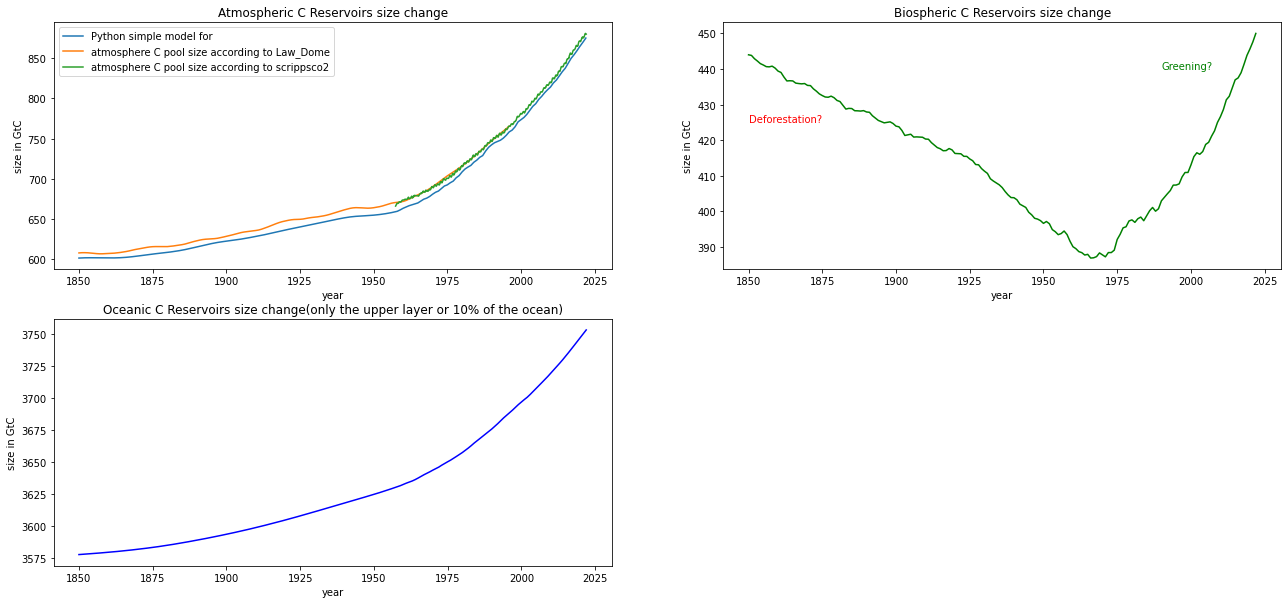

Atmospheric C Reservoirs size in the year 2021 according to the carbon budget paper is 875 GtC. My model yields value of  875 
 Biosphere C Reservoirs size in the year 2021 according to the carbon budget paper is 450 GtC. My model yields value of  450 
10% of the Oceanic C Reservoirs size in the year 2021 according to the carbon budget paper is 3752.8 GtC GtC. My model yields value of  3752.8


In [ ]:
# check point by plotting the data
# Plot the change in these three reservoirs in time  
fig, axs = plt.subplots(2, 2,figsize=(22, 10))

# first add extra one year to the time array because we forecasted a year in the last code
while len(time)==172:  # Add the year '2022' if you didn't added yet
  time = np.append(time,2022)

axs[0, 0].plot(time, atmosphere, label='Python simple model for',)
axs[0, 0].plot(Law_Dome_CO2[:,0], atmosphere_C_Law_Dome, label='atmosphere C pool size according to Law_Dome')
axs[0, 0].plot(atmosphere_C_scrippsco2, label='atmosphere C pool size according to scrippsco2')
axs[0, 0].set(xlabel= "year", ylabel= "size in GtC")
axs[0, 0].set_title("Atmospheric C Reservoirs size change")
axs[0, 0].legend()

axs[0, 1].plot(time,biosphere, label='biosphere', color='g')
axs[0, 1].set(xlabel= "year", ylabel= "size in GtC")
axs[0, 1].set_title("Biospheric C Reservoirs size change")
axs[0, 1].text(1850,425, "Deforestation?", color='r')
axs[0, 1].text(1990,440, "Greening?", color='g')

axs[1, 0].plot(time,ocean, label='ocean',color='b')
axs[1, 0].set(xlabel= "year", ylabel= "size in GtC")
axs[1, 0].set_title("Oceanic C Reservoirs size change(only the upper layer or 10% of the ocean)")

axs[1, 1].remove()
plt.show()


# check the reservoirs size in 2021 according to my model and compare it with the carbon budget estimation
print('Atmospheric C Reservoirs size in the year 2021 according to the carbon budget paper is 875 GtC. My model yields value of ',round(atmosphere[-1]),
      '\n','Biosphere C Reservoirs size in the year 2021 according to the carbon budget paper is 450 GtC. My model yields value of ',round(biosphere[-1]), '\n'
      '10% of the Oceanic C Reservoirs size in the year 2021 according to the carbon budget paper is 3752.8 GtC GtC. My model yields value of ',round(ocean[-1],1) )

# Running a loop to determin the change in reservoirs δ13C

The balance equation for the atmosphere

δ13C X **new** atmosphere = (δ13C X **old** atmosphere)   +   (δ13C X fluxes)

With the **new** atmosphere I mean the atmosphere size in the next step

With **old** atmosphere I mean the atmosphere in the previous step


rearrange it

δ13C  = [(δ13C X old atmosphere)   +   (δ13C X flux)]    /  new  atmosphere




In [ ]:
for i in range(172):
  atmosphere_13C = np.append(atmosphere_13C, (atmosphere[i]*atmosphere_13C[i] - 
                                              #the atmospher-ocean fluxes
                                              from_Atmosphere_to_ocean[i] * (atmosphere_13C[i]+fractionation_from_atmosphere_to_ocean)  +\
                                              from_ocean_to_Atmosphere[i] * (ocean_13C[i]+fractionation_from_ocean_to_atmosphere) +\
                                               #the atmospher-biosphere fluxes
                                              from_biosphere_to_Atmosphere[i] * biosphere_13C[i] -\
                                              from_Atmosphere_to_biosphere[i] * (atmosphere_13C[i] + weighted_terrestrial_fractionation)  -\
                                               #other fluxes
                                              cement_carbonation_sink[i] *atmosphere_13C[i]- budget_imbalance[i]* atmosphere_13C[i]  +
                                               #the fossil fuel & cement emission fluxes
                                              coal_emission[i]*coal_13C+ gas_emission[i]*gas_13C+ oil_emission[i]*oil_13C+ 
                                              cement_emission[i]*cement_13C+ flaring_emission[i]*flaring_13C+ other_emission[i]*other_13C)/
                                              atmosphere[i+1] )

  biosphere_13C = np.append(biosphere_13C, (biosphere[i]* biosphere_13C[i] - 
                                            from_biosphere_to_Atmosphere[i] * biosphere_13C[i] + 
                                            from_Atmosphere_to_biosphere[i] *(atmosphere_13C[i] + weighted_terrestrial_fractionation) )/biosphere[i+1] )
  ocean_13C = np.append(ocean_13C,( ocean[i]* ocean_13C[i] +
                                   from_Atmosphere_to_ocean[i] *(atmosphere_13C[i]+fractionation_from_atmosphere_to_ocean) -
                                   from_ocean_to_Atmosphere[i] *(ocean_13C[i]+fractionation_from_ocean_to_atmosphere))/ocean[i+1])    
print('Last Atmosphere 13C value is ',atmosphere_13C[-1],'\n','Last Biosphere 13C value is  ',biosphere_13C[-1], '\n','Last Ocean 13C value is  ',ocean_13C[-1])             

Last Atmosphere 13C value is  -8.471701982485934 
 Last Biosphere 13C value is   -24.906341429309048 
 Last Ocean 13C value is   0.7725853392035889


## Check if the model runs correctly by calculating the absolute number of C13 atoms

In [ ]:
# Check point
# Here we will check if all in=out of the C13 atoms  in the system

# Assume that one GtC of the VPDB standard has 1000 000 atoms
# VPDB_standard = 1000 000
VPDB_standard = 1000000
# then a sample with (-5.5 permil for example) has [ VPDB_standard + ( -5.5 * VPDB_standard /1000) ]  atoms
Begin_atmosphere_13C_per_GtC = VPDB_standard + atmosphere_13C[0] * VPDB_standard /1000
Begin_ocean_13C_per_GtC      = VPDB_standard + ocean_13C[0]      * VPDB_standard /1000
Begin_biosphere_13C_per_GtC  = VPDB_standard + biosphere_13C[0]  * VPDB_standard /1000

end_atmosphere_13C_per_GtC = VPDB_standard + atmosphere_13C[-1] * VPDB_standard /1000
end_ocean_13C_per_GtC      = VPDB_standard + ocean_13C[-1]      * VPDB_standard /1000
end_biosphere_13C_per_GtC  = VPDB_standard + biosphere_13C[-1]  * VPDB_standard /1000

gas_13C_per_GtC     = VPDB_standard + gas_13C * VPDB_standard /1000
flaring_13C_per_GtC = VPDB_standard + flaring_13C * VPDB_standard /1000
coal_13C_per_GtC    = VPDB_standard + coal_13C * VPDB_standard /1000
oil_13C_per_GtC     = VPDB_standard + oil_13C * VPDB_standard /1000
cement_13C_per_GtC  = VPDB_standard + cement_13C * VPDB_standard /1000
other_13C_per_GtC   = VPDB_standard + other_13C * VPDB_standard /1000 


# The Begin_reservoirs must equal to the End_reservoirs + the 6 fossil fluxes IN        - fluxes OUT (cement carbonation and budget imbalance)
# The Begin_reservoirs must equal to the End_reservoirs + the 6 fossil fluxes IN        - C13_lost_to_cement- C13_lost_to_imbalance
Begin_reservoirs = Begin_atmosphere_13C_per_GtC * atmosphere[0] +  Begin_ocean_13C_per_GtC *ocean [0] + Begin_biosphere_13C_per_GtC * biosphere[0]
End_reservoirs = end_atmosphere_13C_per_GtC * atmosphere[-1] +  end_ocean_13C_per_GtC *ocean [-1] + end_biosphere_13C_per_GtC * biosphere[-1]


# make a loop to change the atmosphere_13C array to an absolute value of total C13 atoms per GtC
# then will calculate  the C13 atoms which will be lost or gained in this loop
atmosphere_13C_per_GtC =[]
C13_lost_to_cement     =[]
C13_lost_to_imbalance  =[]
C13_gained_from_fossils=[]

for i in range(172):
  atm = VPDB_standard + atmosphere_13C[i] * VPDB_standard /1000
  atmosphere_13C_per_GtC.append(atm)

  c= cement_carbonation_sink[i]* atm  
  C13_lost_to_cement.append(c)

  b= budget_imbalance[i]* atm  
  C13_lost_to_imbalance.append(b)

  f= coal_emission[i] * coal_13C_per_GtC+ gas_emission[i] * gas_13C_per_GtC + oil_emission[i] * oil_13C_per_GtC+ cement_emission[i] * cement_13C_per_GtC+ flaring_emission[i] * flaring_13C_per_GtC+ other_emission[i] * other_13C_per_GtC
  C13_gained_from_fossils.append(f)

C13_lost_to_cement    = sum(C13_lost_to_cement)
C13_lost_to_imbalance = sum(C13_lost_to_imbalance)
C13_gained_from_fossils =sum(C13_gained_from_fossils)

# Z must be zero or ~zero
Z = Begin_reservoirs + C13_gained_from_fossils - C13_lost_to_cement - C13_lost_to_imbalance - End_reservoirs
if Z <0.00001:
  print("The control confirm that the model is working perfect and that the difference in the calculation is just ",Z)
else:
  print("failed :( and the difference in calculation is  ",Z)


The control confirm that the model is working perfect and that the difference in the calculation is just  1.9073486328125e-06


# Plotting a comparison with Scrippsco2 data

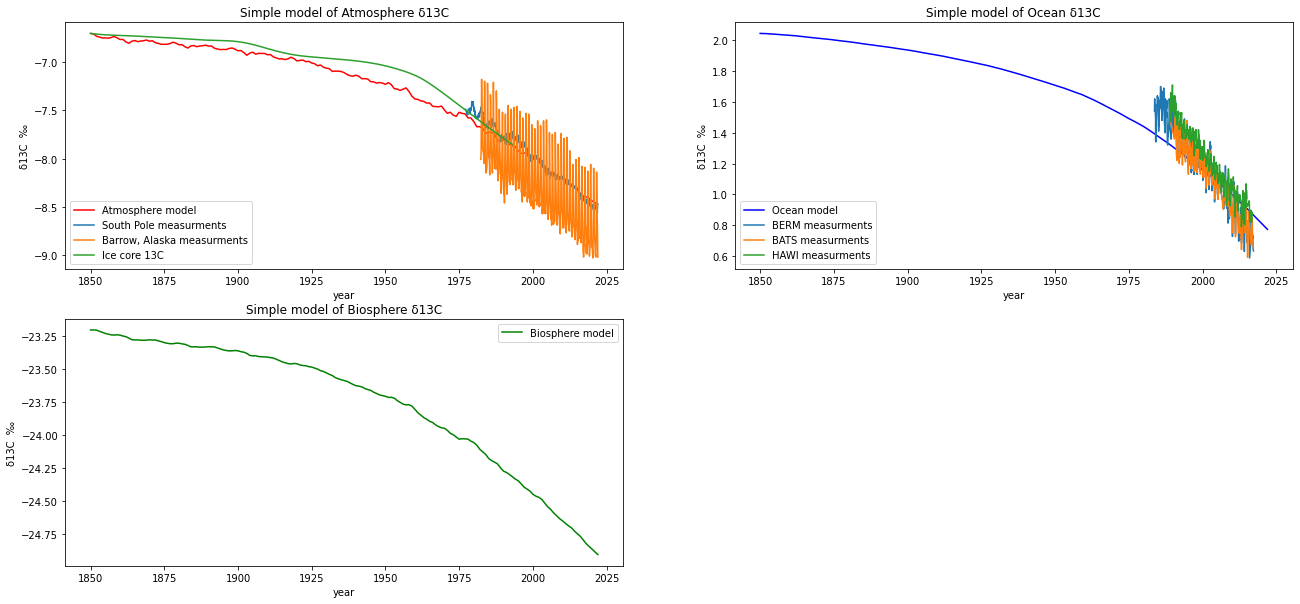

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(22, 10))

axs[0, 0].plot(time, atmosphere_13C, label='Atmosphere model',color='r')
axs[0, 0].plot(spo_time, south_pole_13C, label='South Pole measurments')
axs[0, 0].plot(ptb_time, ptb_13C, label='Barrow, Alaska measurments')
axs[0, 0].plot(Law_Dome_d13C[:,0], Law_Dome_d13C[:,1], label='Ice core 13C')
axs[0, 0].set(xlabel= "year", ylabel= "δ13C  ‰")
axs[0, 0].set_title("Simple model of Atmosphere δ13C")
axs[0, 0].legend()

axs[0, 1].plot(time,ocean_13C, label='Ocean model',color='b')
axs[0, 1].plot(berm_time,berm_13C, label='BERM measurments')
axs[0, 1].plot(bats_time,bats_13C, label='BATS measurments')
axs[0, 1].plot(hawi_time,hawi_13C, label='HAWI measurments')
axs[0, 1].set(xlabel= "year", ylabel= "δ13C  ‰")
axs[0, 1].set_title("Simple model of Ocean δ13C")
axs[0, 1].legend()

axs[1, 0].plot(time,biosphere_13C, label='Biosphere model',color='g')
axs[1, 0].set(xlabel= "year", ylabel= "δ13C  ‰")
axs[1, 0].set_title("Simple model of Biosphere δ13C")
axs[1, 0].legend()

axs[1, 1].remove()
plt.show()

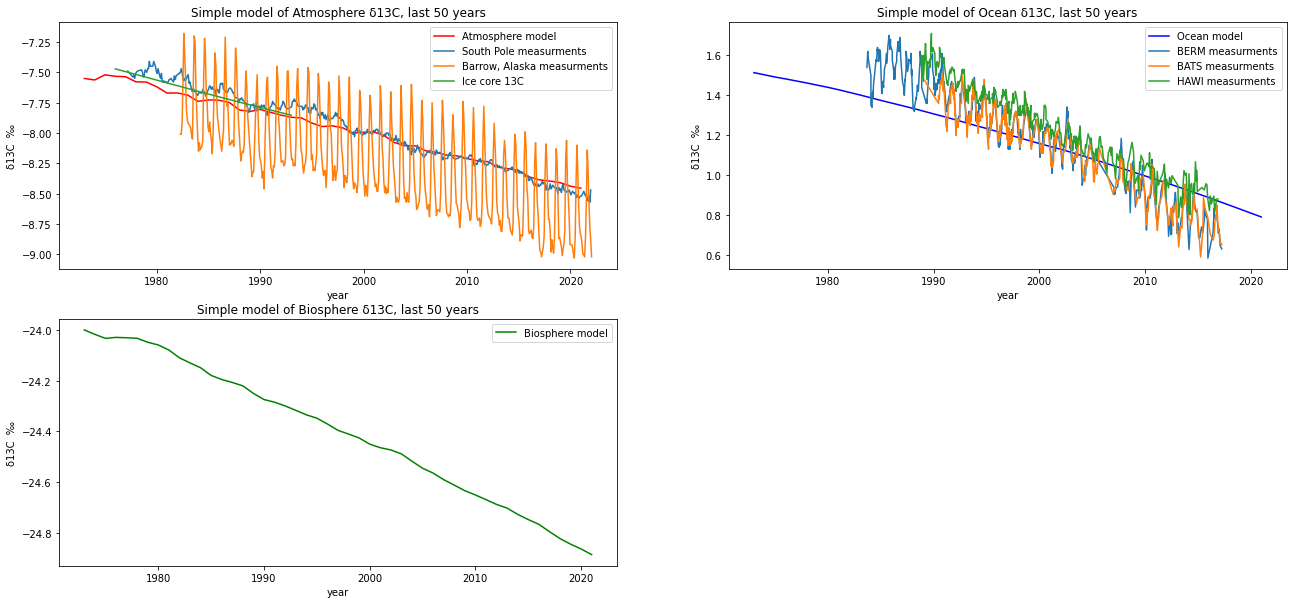

In [ ]:
# zoom to the last 50 years
fig, axs = plt.subplots(2, 2,figsize=(22, 10))

axs[0, 0].plot(time[-50:-1], atmosphere_13C[-50:-1], label='Atmosphere model',color='r')
axs[0, 0].plot(spo_time, south_pole_13C, label='South Pole measurments')
axs[0, 0].plot(ptb_time, ptb_13C, label='Barrow, Alaska measurments')
axs[0, 0].plot(Law_Dome_d13C[-18:,0], Law_Dome_d13C[-18:,1], label='Ice core 13C')
axs[0, 0].set(xlabel= "year", ylabel= "δ13C  ‰")
axs[0, 0].set_title("Simple model of Atmosphere δ13C, last 50 years")
axs[0, 0].legend()

axs[0, 1].plot(time[-50:-1],ocean_13C[-50:-1], label='Ocean model',color='b')
axs[0, 1].plot(berm_time,berm_13C, label='BERM measurments')
axs[0, 1].plot(bats_time,bats_13C, label='BATS measurments')
axs[0, 1].plot(hawi_time,hawi_13C, label='HAWI measurments')
axs[0, 1].set(xlabel= "year", ylabel= "δ13C  ‰")
axs[0, 1].set_title("Simple model of Ocean δ13C, last 50 years")
axs[0, 1].legend()

axs[1, 0].plot(time[-50:-1],biosphere_13C[-50:-1], label='Biosphere model',color='g')
axs[1, 0].set(xlabel= "year", ylabel= "δ13C  ‰")
axs[1, 0].set_title("Simple model of Biosphere δ13C, last 50 years")
axs[1, 0].legend()

axs[1, 1].remove()
plt.show()

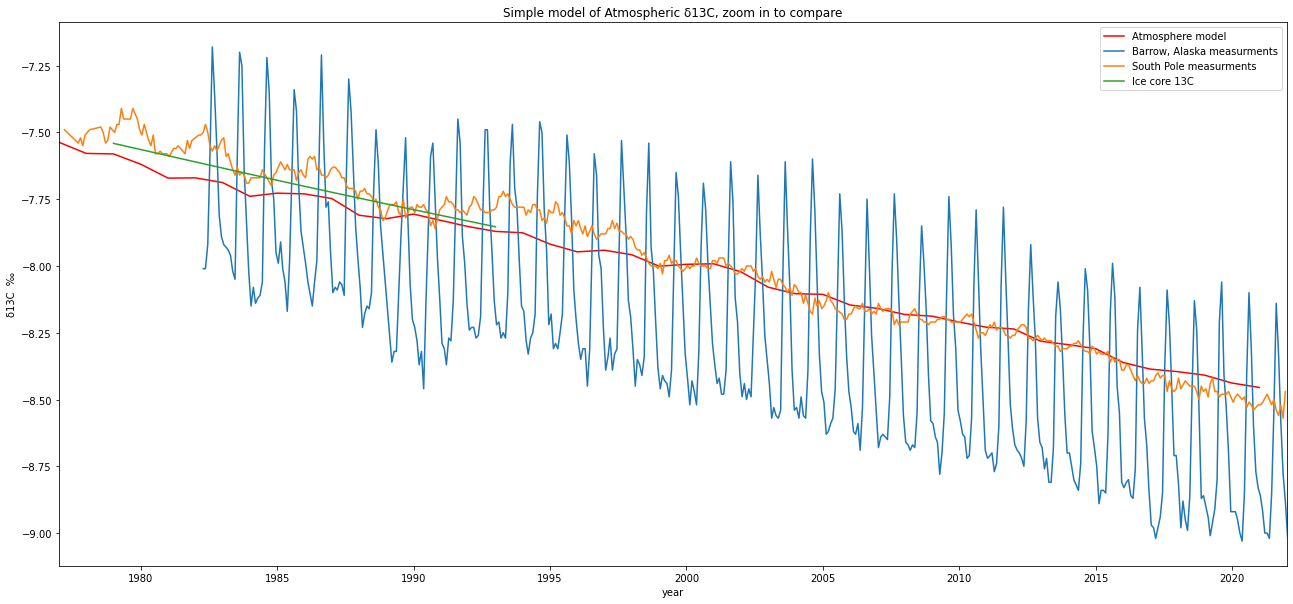

In [ ]:
# more zoom in Atmosphere

plt.figure(figsize=(22, 10))
plt.plot(time[-50:-1], atmosphere_13C[-50:-1], label='Atmosphere model',color='r')
plt.plot(ptb_time, ptb_13C, label='Barrow, Alaska measurments')
plt.plot(south_pole_13C, label='South Pole measurments')
plt.plot(Law_Dome_d13C[-15:,0], Law_Dome_d13C[-15:,1], label='Ice core 13C')
#plt.plot(spo_time, spo_13C, label='South Pole measurments')
plt.xlabel("year")
plt.ylabel("δ13C  ‰")
plt.title("Simple model of Atmospheric δ13C, zoom in to compare")
plt.xlim(1977,2022)
plt.legend()
plt.show()

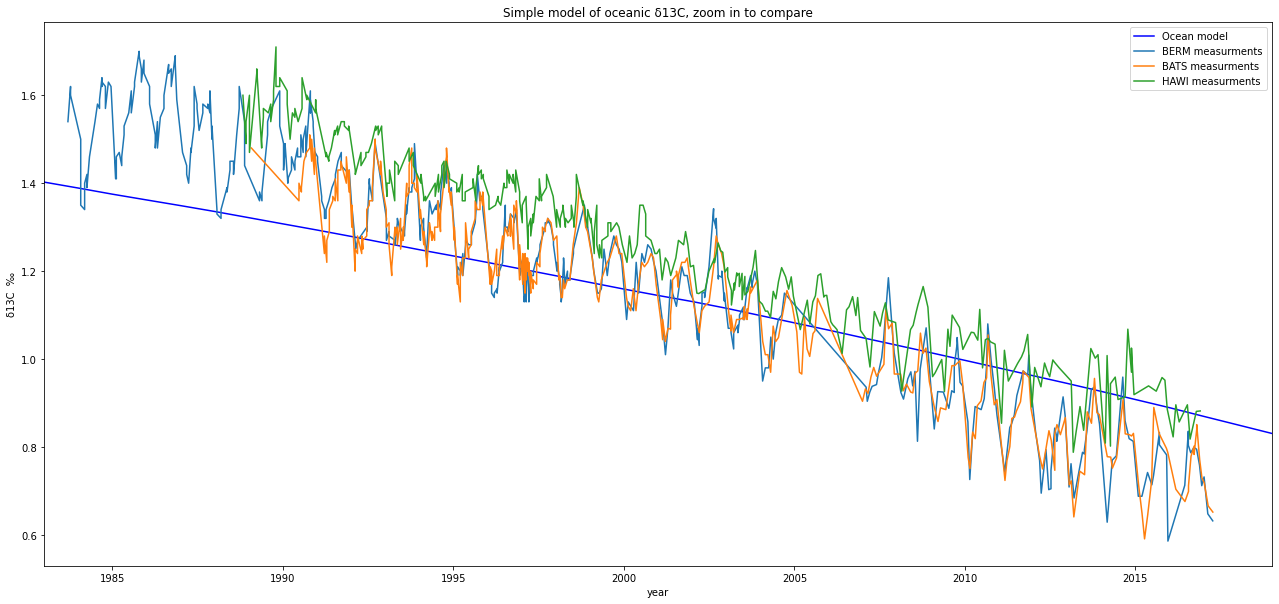

In [ ]:
# more zoom in ocean

plt.figure(figsize=(22, 10))
plt.plot(time[-50:-1],ocean_13C[-50:-1], label='Ocean model',color='b')
plt.plot(berm_time,berm_13C, label='BERM measurments')
plt.plot(bats_time,bats_13C, label='BATS measurments')
plt.plot(hawi_time,hawi_13C, label='HAWI measurments')
plt.xlabel("year")
plt.ylabel("δ13C  ‰")
plt.title("Simple model of oceanic δ13C, zoom in to compare")
plt.xlim(1983,2019)
plt.legend()
plt.show()

# Discussions

## Points  need to be improved in the model




* There are six process determine CO2 exchange between atmosphere and ocean 

1- Air invasion to the water

2- Air diffusion from water.

3- precipitations: rain water wash the CO2 from atmosphere and as a result the rain water is between 5.0 and 5.5

4- Evaporation: when water evaporate it lose its CO2 to the atmosphere

5- Biota (planktonic) intake and decay which exchange CO2 between atmosphere and surface water

6- Biota (benthos) intake and decay which exchange CO2 between DIC and organic carbon



In this code I accounted for the first two only? 

* It will be a good idea to consider the change in the C3 and C4 vegeation in developing this model. The crops and the agriculture revolutions created anthropgenic landscape like the Corn Belt which is C4. Also the natural varability because the C4 plants vulnerablity for drought and El Niño in the tropics. 

 * There are other fluxes that mix with the atmospheric carbon with different  13C signatures like biomass burning or from wetland or from termite according to:  page 14 Etiope et al. 2008

 * I assumed that the ocean has only DIC but the ocean also has Organic Carbon OC and Biota which are both depleted from δ13C( figure 2 from Lamb et al. 2006). Furthermore the riverine OC input is highly depleted from δ13C. The latter flux is not in the model at all. 

The models in IPCC (which are used in the Global Carbon Budget paper) reports assume that, in this pre-industrial equilibrium state, the ocean return ~0.6 GtC/year to the atmosphere to offset the (rivers' organic Carbon and the weathering inorganic carbon) (World ocean review, 2010). Nowadays, the river's discharge to the ocean is decreased with the dams; I expect a proportional Carbon sink because Carbon ends in dams and irrigated land instead of the ocean. The weathering flux must be grown at this time because of the increased atmospheric CO2, which cause more chemical weathering.

## Discussion about disequilibrium fluxes

### Vegetation disequilibrium fluxes   
There are high variations in the estimated value of annual vegetation CO2 disequilibrium fluxes (Koren et al. 2019). These different values resulted from different calculation methods. Beer et al. (2010) used eddy covariance measurements of the CO2 method and estimated 120 PgC/year for Gross primary production GPP. In contrast, Welp et al. (2011) used the isotopic CO2 variation and reported 150–175 PgC/year range values. Koren et al. (2019) used the TM5 model and estimated a vegetation disequilibrium flux of 111 GtC averaged over years 2012 and 2013. Hofmann et al. (2017) reported 103 GtC of vegetaion flux. Hoag et al. (2005) reported 85.6 of vegetaion flux.     
Friedlingstein et al. (2022) reported a flux of **130** PgC/year value, which is used in this model. Nevertheless, the flux is not constant, as it assumed in this model! More details on the annual variation of GPP needed to be adapted in the model to reflect the natural annual variations.

###Ocean disequilibrium flux  
Koren et al. (2019) calculated an ocean disequilibrium flux of 86.9 GtC. Hofmann et al. (2017) reported 90 GtC of ocean flux. Hoag et al. (2005) reported 88 of ocean flux.

### Soil disequilibrium flux  
The magnitudes of the soil disequilibrium
flux has high uncertainty. Hofmann et al. (2017) estimated 30 GtC as a disequilibrium flux (from & to) the soil through water. Same estimation reported by (Stern et al., 2001). Neverthless, Wingate et al., (2009) has a higher estimation of soil flux of 450 GtC/year. The utilization of anhydrase enzyme in soils is the responsible for this high soil invasion flux (Wingate et al., 2009). 

## Discussion about biosphere size & biosphere accelerated sink

The biosphere absorbs ~29**±8**% of our **ANNUAL** emission  **during the last decade** according to Keeling & Graven; 2021

However, the biosphere figure above, shows that this CO2 sink is just a restoration of the original reservoir size. We almost reached the 1850 reservoir capacity. Do we have any extra **capacity**? Can the biosphere accommodate more carbon without amplification of the wildfire risk? In the next lines I will try to answer this question in fast calculation


In [ ]:
greening= round(biosphere.max()- biosphere.min())
greening_percentage = round((greening/biosphere.min())*100)

print('The total NETTO greening of',np.where(biosphere== biosphere.max())[0]-np.where(biosphere== biosphere.min())[0] ,'years\
, from the seventies till today is',greening,'GtC,\
 This is a', greening_percentage, '% increase in capacity' )

The total NETTO greening of [56] years, from the seventies till today is 63 GtC, This is a 16 % increase in capacity


**16%** increase in vegetation in the last 50 years according to the model must be an alarming issue for the model and the biosphere capacity. Suppose that the forest area is a third of the world's area; that will be an extra ≈1.5 kilos of carbon in every single square meter of the forest.   
For the sake of calculation simplification: assume that the vegetation is a carbohydrate molecule CH2O with 90% water. In other words:   
For every mole of carbon there will be one H2O then there will be 90% water.   
So for the 1.5 kilos of Carbon we calculated above there will be 2.25 kilos of H2O and (1.5+2.25) x 9  water  
That will make the extra greens vegetation ~37 kilos  in every single square meter of the forest which is unrealistic. 


The vegetation **mass** increases in the model don't agree with other measurements and bookkeeping records in the short past or older past. The FAO data shows a decrease of 3.3% in the Forest **area** in the last thirty years.  

Hannah Ritchie and Max Roser (2021) indicate that The forest **area** was 22% bigger in 1850 than today. The Carbon Budget paper and this model are the same, which is anti-intuitive. So I would expect a 22%  decrease in vegetation reservoir.  

There is high uncertainty in the biosphere carbon sink. For example, TRENDY considers CO2 fertilization to account for ~70% of the Greening (Piao et al., 2020), whereas Chi Chen et al. (2019) consider human land-use management responsible for more than a third of the greening. The uncertainty in the latest two examples explains the high uncertainty estimation of ±100%, according to Keeling & Graven's (2021) 

my reasoning: Biosphere is not only the vegetation. The soil is an essential part of the biosphere. McGuire et al. (2001) modeled an increase in biospheric carbon sink. The soil and organic Carbon reservoir are missing in my model-system. 63 GtC **NETTO** of vegetation growth in 56 years is impossible. The vegetation is growing slowly in reality and maybe decrease. The carbon is stored as organic carbon and leaked to the ocean, groundwater, and soil as an organic compound that stays there for a long time, especially if it is highly diluted, like sewage ending in the ocean. High dilution prevents organic matter decay because it minimizes the chance of meeting organisms to cause its decay.  

It is fundamental to account other fluxes like the livestock waste flux in the model because this waste is mostly washed to ocean/groundwater or in the best scenario added to the soil. When it is washed into the ocean then the decay will take a very long time if the mixing is fast. When it turns to soil it will decay relatively faster. Our livestock (as C reservoir) is now ~15 times bigger than all wild mammals on Earth (Bar-On et al. 2018)

Furthermore, we must account for the `mummifying effects` of antibiotics, pesticides, herbicides, and fungicides. These chemicals **kill** and `mummify` small organisms. The total weight of these ‘small’ organisms make significantly enormous carbon reservoirs according to Bar-On et al. (2018), for example, bacteria and archaea (≈77 Gt C) . `mummified` part of this reservoir will store a big amount of carbon in itself. In addition to that, `mummifying` will prevent these organisms from eating carbon and delay any decay of organic matter. We could describe this chemicals effect as a mummifying effect that stop any life , hence stop the decay. Evenmore, I will speculate in this small organisms world about a pandemic that will create fluctuations in the flux. Maybe part of our observed natural signal is a viral pandemics in this small organisms world.    

Stratification and expanding of oxygen depleted zones in the ocean play almost the same role as chemicals in killing organisms but it kills all organisms in all sizes. Algal bloom on the surface of anoxic sea  is another example.  

Natural weathering absorbs roughly 1.1 billion tons CO2 sink according to Strefler et al. (2018) but this is not in the Global Carbon Budget
Moreover, The atmospheric CO2 concentration has increased and the mining activities increased as well. I would expect that these increases results in more CO2 in the weathering/sink?  
To fix the Carbon Budget estimation we should quantify the these 'other' fluxes and add them to the model

**Other Carbon fluxes qantifucation**  

1. Black carbon from Incomplete burning (Even the wildfire has this). so it has two sources (fossil fuels and land use change).  

2. washing of organic matter from atmosphere to the ocean and land
3. Urban Sewage and waste   
5. Agriculture waste, food waste, Woodworking, ash, animal waste (liquid and solid)  
6. Enhancement of food storage with freezing, drying, oxygen free packaging, salting, and silos.    
7. Chemicals effect on decay time (pesticides, herbicides, fungicides,antibiotics, and plastic) and expanding of marine anoxia zones. These effect mostly the bacteria & archaea reservoir but also the vegetation(≈77 Gt C)
8. River organic matter flux to the ocean  
9. Weathering flux  

# Model parameterizations
There are four parameterizations approaches:  
1- Changing the three fractionation factors <---- I did this  
2- Changing the fossil fuel d13 value <---- I did this  
3- Importing the other fluxes calculations from Friedlingstein et al. (2022) or adding the uncertainties  
4- Change the upper ocean reservoir to make it smaller (more realistic for annual change) and adding a soil reservoir with disequilibrium fluxes, or adding organic matter reservoir. 



Plans for fossil fuel d13 value parameterizations  
5 loops X 5 loops and by every fossil fuel flux, vary the d13 value of each fossil fuel with ± 1 std then run the model. After that use the **cost function** to find the best fit between the model and the real measurement from spo and/or ocean  
If you can not find std in the literature  then take 20%

# Acknowledgments
It was a splendid learning journey under the supervision of Prof. Dr. Roderik van de Wal & Prof. Dr. Thomas Roeckmann. I received assistance and guidance from my supervisors and many professors. I want to thank them all from my heart for their time, leads, network, and tips. Here are names list ordered alphabetically:    
Prof. Dr. Robbie Andrew   
Prof. Dr. Kees Klein Goldewijk   
Prof. Dr. Gerbrand Koren  
Prof. Dr. Jack Middelburg  
Prof. Dr. Jaap Nienhuis  
Prof. Dr. Stephen Sitch  


#References 

Andres, R. J., Marland, G. R. E. G. G., Boden, T., & Bischof, S. T. E. V. E. (1994). Carbon dioxide emissions from fossil fuel consumption and cement manufacture, 1751-1991; and an estimate of their isotopic composition and latitudinal distribution (No. CONF-9307181-4). Oak Ridge National Lab., TN (United States); Oak Ridge Inst. for Science and Education, TN (United States). https://www.osti.gov/servlets/purl/10185357 

<br>

Bar-On, Y. M., Phillips, R., & Milo, R. (2018). The biomass distribution on Earth. Proceedings of the National Academy of Sciences, 115(25), 6506-6511. https://doi.org/10.1073/pnas.1711842115  

<br>

Battle, M., Bender, M. L., Tans, P. P., White, J. W. C., Ellis, J. T., Conway, T., & Francey, R. J. (2000). Global carbon sinks and their variability inferred from atmospheric O2 and δ13C. Science, 287(5462), 2467-2470. https://www.science.org/doi/abs/10.1126/science.287.5462.2467

<br>

Beer, C., Reichstein, M., Tomelleri, E., Ciais, P., Jung, M., Carvalhais, N., Rodenbeck, C., Arain, M. A., Baldocchi, D., Bonan, G. B., Bondeau, A., Cescatti, A., Lasslop, G., Lindroth, A., Lomas, M., Luyssaert, S., Margolis, H., Oleson, K. W., Roupsard, O., Veenendaal, E., Viovy, N., Williams, C., Woodward, F. I., & Papale, D. (2010). Terrestrial gross carbon dioxide uptake: Global distribution and covariation with climate. Science, 329(5993), 834–838. https://doi.org/10.1126/science.1184984  


<br>

Brugnoli, E., & Farquhar, G. D. (2000). Photosynthetic fractionation of carbon isotopes. Photosynthesis: physiology and metabolism, 399-434.  https://link.springer.com/chapter/10.1007/0-306-48137-5_17

<br>

Chen, C., Park, T., Wang, X., Piao, S., Xu, B., Chaturvedi, R. K., ... & Myneni, R. B. (2019). China and India lead in greening of the world through land-use management. Nature sustainability, 2(2), 122-129. https://www.nature.com/articles/s41893-019-0220-7  

<br>

Etiope, G., Lassey, K. R., Klusman, R. W., & Boschi, E. (2008). Reappraisal of the fossil methane budget and related emission from geologic sources. Geophysical Research Letters, 35(9).https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2008GL033623 

<br>

FAO data retrieved on 9-3-2023 from https://data.worldbank.org/indicator/AG.LND.FRST.ZS   

<br>

Friedlingstein, P., O'sullivan, M., Jones, M. W., Andrew, R. M., Gregor, L., Hauck, J., ... & Zheng, B. (2022). Global carbon budget 2022. Earth System Science Data, 14(11), 4811-4900. https://essd.copernicus.org/articles/14/4811/2022/  https://essd.copernicus.org/articles/14/4811/2022/essd-14-4811-2022-f02-web.png   

<br>

Hannah Ritchie and Max Roser (2021) - "Forests and Deforestation". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/forests-and-deforestation' [Online retrieved on 9-3-2023]   

<br>

Hoag, K. J., Still, C. J., Fung, I. Y., & Boering, K. A. (2005). Triple oxygen isotope composition of tropospheric carbon dioxide as a tracer of terrestrial gross carbon fluxes. Geophysical Research Letters, 32(2). https://doi.org/10.1029/2004GL021011  

<br>

Hofmann, M. E. G., Horváth, B., Schneider, L., Peters, W., Schützenmeister, K., & Pack, A. (2017). Atmospheric measurements of Δ17O in CO2 in Göttingen, Germany reveal a seasonal cycle driven by biospheric uptake. Geochimica et Cosmochimica Acta, 199, 143-163. https://doi.org/10.1016/j.gca.2016.11.019   

<br>

IEA (2018), The Future of Petrochemicals, IEA, Paris https://www.iea.org/reports/the-future-of-petrochemicals, License: CC BY 4.0   

<br>

Keeling, R. F., & Graven, H. D. (2021). Insights from time series of atmospheric carbon dioxide and related tracers. Annual Review of Environment and Resources, 46, 85-110. https://doi.org/10.1146/annurev-environ-012220-125406    

<br>

Koren, G., Schneider, L., van der Velde, I. R., van Schaik, E., Gromov, S. S., Adnew, G. A., ... & Peters, W. (2019). Global 3‐D simulations of the triple oxygen isotope signature Δ17O in atmospheric CO2. Journal of Geophysical Research: Atmospheres, 124(15), 8808-8836. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019JD030387  

<br>

Global Monitoring Laboratory https://gml.noaa.gov/ccgg/isotopes/c13tellsus.html retrieved 6-3-2023

<br>

Lamb, A. L., Wilson, G. P., & Leng, M. J. (2006). A review of coastal palaeoclimate and relative sea-level reconstructions using δ13C and C/N ratios in organic material. Earth-Science Reviews, 75(1-4), 29-57. http://dx.doi.org/10.1016/j.earscirev.2005.10.003   

<br>

McGuire, A. D., Sitch, S., Clein, J. S., Dargaville, R., Esser, G., Foley, J., ... & Wittenberg, U. (2001). Carbon balance of the terrestrial biosphere in the twentieth century: Analyses of CO2, climate and land use effects with four process‐based ecosystem models. Global biogeochemical cycles, 15(1), 183-206. https://pubs.er.usgs.gov/publication/70073959   

<br>

Menoud, M., Van Der Veen, C., Lowry, D., Fernandez, J. M., Bakkaloglu, S., France, J. L., ... & Röckmann, T. (2022). New contributions of measurements in Europe to the global inventory of the stable isotopic composition of methane. Earth System Science Data, 14(9), 4365-4386. https://essd.copernicus.org/articles/14/4365/2022/essd-14-4365-2022.pdf 


<br>

Piao, S., Wang, X., Park, T., Chen, C., Lian, X. U., He, Y., ... & Myneni, R. B. (2020). Characteristics, drivers and feedbacks of global greening. Nature Reviews Earth & Environment, 1(1), 14-27. https://www.nature.com/articles/s43017-019-0001-x   

<br>

Quay, P., Sonnerup, R., Westby, T., Stutsman, J., & McNichol, A. (2003). Changes in the 13C/12C of dissolved inorganic carbon in the ocean as a tracer of anthropogenic CO2 uptake. Global Biogeochemical Cycles, 17(1), 4-1. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2001GB001817 

<br>

Rubino, Mauro; Etheridge, David; Thornton, David; Allison, Colin; Francey, Roger; Langenfelds, Ray; Steele, Paul; Trudinger, Cathy; Spencer, Darren; Curran, Mark; Van Ommen, Tas; Smith, Andrew (2019): Law Dome Ice Core 2000-Year CO2, CH4, N2O and d13C-CO2. v2. CSIRO. Data Collection. https://doi.org/10.25919/5bfe29ff807fb  also  https://www.ncei.noaa.gov/access/paleo-search/study/25830  

<br>  

Ruddiman, W. F. (2001). Earth's climate: past and future. Macmillan. figure 11-5

<br>

Scrippsco2 project https://scrippsco2.ucsd.edu/data/atmospheric_co2/sampling_stations.html . The data licensed under a CC BY license. It is live document **monthly updated**   *C. D. Keeling, S. C. Piper, R. B. Bacastow, M. Wahlen, T. P. Whorf, M. Heimann, and H. A. Meijer, Atmospheric CO2 and 13CO2 exchange with the terrestrial biosphere and oceans from 1978 to 2000: observations and carbon cycle implications, pages 83-113, in "A History of Atmospheric CO2 and its effects on Plants, Animals, and Ecosystems", editors, Ehleringer, J.R., T. E. Cerling, M. D. Dearing, Springer Verlag, New York, 2005.*

<br>

Sherwood, O. A., Schwietzke, S., Arling, V. A., & Etiope, G. (2017). Global inventory of gas geochemistry data from fossil fuel, microbial and burning sources, version 2017. Earth System Science Data, 9(2), 639-656. https://essd.copernicus.org/articles/9/639/2017/ 

<br>

Stern, L. A., Amundson, R., & Baisden, W. T. (2001). Influence of soils on oxygen isotope ratio of atmospheric CO2. Global Biogeochemical Cycles, 15(3), 753–759. https://doi.org/10.1029/2000GB001373  

<br>

Still, C. J., Berry, J. A., Collatz, G. J., & DeFries, R. S. (2003). Global distribution of C3 and C4 vegetation: carbon cycle implications. Global biogeochemical cycles, 17(1), 6-1. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2001GB001807

<br>

Strefler, J., Amann, T., Bauer, N., Kriegler, E., & Hartmann, J. (2018). Potential and costs of carbon dioxide removal by enhanced weathering of rocks. Environmental Research Letters, 13(3), 034010. https://iopscience.iop.org/article/10.1088/1748-9326/aaa9c4  https://www.pik-potsdam.de/en/news/latest-news/enhanced-weathering-of-rocks-can-help-to-suck-co2-out-of-the-air-2013-a-little  

<br>

Stuiver, M. (1978). Atmospheric Carbon Dioxide and Carbon Reservoir Changes: Reduction in terrestrial carbon reservoirs since 1850 has resulted in atmospheric carbon dioxide increases. Science, 199(4326), 253-258. https://doi.org/10.1126/science.199.4326.253    

<br>

Siegenthaler, U., & Münnich, K. O. (1981). 12C/13C fractionation during CO2 transfer from air to sea. Carbon Cycle Modeling. https://scope.dge.carnegiescience.edu/SCOPE_16/SCOPE_16_1.5.05_Siegenthaler_249-257.pdf

<br>

Vadeboncoeur, M. A., Jennings, K. A., Ouimette, A. P., & Asbjornsen, H. (2020). Correcting tree-ring δ 13C time series for tree-size effects in eight temperate tree species. Tree Physiology, 40(3), 333-349. https://academic.oup.com/treephys/article/40/3/333/5715048  

<br>

Wanninkhof, R. I. K. (1985). Kinetic fractionation of the carbon isotopes 13C and 12C during transfer of CO2 from air to seawater. Tellus B: Chemical and Physical Meteorology, 37(3), 128-135.  

<br>

Welp, L. R., Keeling, R. F., Meijer, H. A. J., Bollenbacher, A. F., Piper, S. C., Yoshimura, K., Francey, R. J., Allison, C. E., & Wahlen, M. (2011). Interannual variability in the oxygen isotopes of atmospheric CO2 driven by El Niño. Nature, 477(7366), 579–582. https://doi.org/10.1038/nature10421  

<br>

Wingate, L., Ogée, J., Cuntz, M., Genty, B., Reiter, I., Seibt, U., Yakir, D., Maseyk, K., Pendall, E. G., Barbour, M. M., Mortazavi, B., Burlett, R., Peylin, P., Miller, J., Mencuccini, M., Shim, J. H., Hunt, J., & Grace, J. (2009). The impact of soil microorganisms on the global budget of 18O in atmospheric CO2. Proceedings of the National Academy of Sciences, 106(52), 22,411–22,415. https://doi.org/10.1073/pnas.0905210106   

<br>

World ocean review,2010. retrieved 28-3-2023 [ https://worldoceanreview.com/en/wor-1/ocean-chemistry/co2-reservoir/ ]   

#To do list:



In the carbon budget paper: the surface ocean fCO2-based data products are adjusted for a pre-industrial steady state source of CO2 from rivers (of 0.65 GtC/yr) to be comparable with the ocean model results and to satisfy the definition of the ocean carbon sink used in the Global Carbon Budget.  
I need to take it in account because the δ13C of the rivers are very low  
But how?

Import the *Model Spread (sd)* from the excel of GCB paper for every flux and plot it.  
Can you rework the sd in the model? Or will it become very big? Maybe just two bounds of maximum and minimum instead of the sd

Check if the ocean sink is only physical. What is about the ocean biological pump, evaporation outgassing, and precipitation CO2 solution. 

Convert the whole model time to higher resolution because for example: the decay happens  in the age spectrum and not in one step of one year. 

upload to GitHub

Use same y-axis in both graphs of GCB and plot the cumulative for the right one on secondary axis

Tip: Change the d13C_value of land_use_change emission to be equal to the C3 value because the emission is mostly wood which is C3.  
I don’t that will make a big difference because the value is very near to the C# value. More importantly the netto flux is burning but the disequilibrium flux is not

Plan  
1- Merge SPO measurements from the scrippsco2 database with the Law dome  
2- Interpolate the series to annual time  
3- Find a solution to avoid the jump between the two series  
4- merge all three ocean signals from scrippsco2  
5- You have two series ready for the atmospheric and oceanic value. These series can be used in calibrations and parameterizations. 

I need to find out how to do the cost function in python

email people to get more oceanic data https://hahana.soest.hawaii.edu/hot/crequest/main.html  https://scrippsco2.ucsd.edu/data/seawater_carbon/ocean_time_series.html  



import  fire database
https://www.globalfiredata.org/data.html 

Tips from today’s meeting  
Drought affects the fractionation. See the first figure of this paper over drought https://www.nature.com/articles/s41561-018-0212-7  
  .
  
-You need to take in your consideration that C13 fractionation also change with the change of CO2 concentration  
  .

The soil and carboxylic anhydride have nothing to do with 13C. It affects the oxygen isotope. So the soil reservoir will have no effect in your model and you could ignore it.  
  .

Magdalena Hofmann heeft een box model en doet een Monte Carlo analyse  
https://www.sciencedirect.com/science/article/pii/S0016703716306615  
Maybe that will be the same for your data using the uncertainty   
  .

paper van Keeling (box model of 13C)  
https://www.pnas.org/doi/10.1073/pnas.1619240114  
Ik heb de appendix toegevoegd aan deze email.  
  .

Thesis over 13C stable isotopes  
https://library.wur.nl/WebQuery/wurpubs/488327   

  .

PhD dissertation 


To improve your fluxes --> see page 28 of chapter 5 of IPCC https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter05.pdf
The most important points are   
* The ocean surface reservoir size
* The ocean disequilibrium flux change with CO2 concentartion in atmosphere
* Marine biota   

almost same changes in disequilibrium fluxes https://pubs.acs.org/doi/10.1021/ef200914u#

“correct” time series for the atmospheric C reservoir using the CO2 concentration  
Read Robbie papers  
Fractionation changes in the time.    
Corinne Le Quéré  marine biota flux
